<a href="https://colab.research.google.com/github/youssefkamil/Interactive-Maps-Clustering-San-Francisco-Police-Department-Incidents/blob/main/Franchise_Decision_to_Invest_in_Prominent_Location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Franchise Decision to Invest in Prominent Locations**

<a  align=center><img src = "https://www.qsrmagazine.com/sites/default/files/news-image/freddy-s-opens-first-international-location.jpg" width = 1200> </a>

<h1 align=center><font size = 5>Scrap Neighbourhoods Data - Geocoding Web Services - Foursquare Location Services</font></h1>

# **1. Import Libraries**

In [ ]:
!pip install folium==0.5.0

In [ ]:
import pandas as pd
import numpy as np
import time
import requests, json
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim  #geopy is a Python client for several popular geocoding web services
from geopy.exc import GeocoderTimedOut
import folium
from sklearn.cluster import KMeans
print("Folium version = ", folium.__version__)

Folium version =  0.5.0


# **2. Get 3 cities data from Wikipedia**

## City1: Cairo Data

In [ ]:
web_page = requests.get("https://en.wikipedia.org/wiki/Category:Districts_of_Cairo").text
web_page

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Category:Districts of Cairo - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ab836d8c-f161-4d75-a25b-983fd04d1a7a","wgCSPNonce":false,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":14,"wgPageName":"Category:Districts_of_Cairo","wgTitle":"Districts of Cairo","wgCurRevisionId":913457674,"wgRevisionId":913457674,"wgArticleId":3686734,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Commons category link is on Wikidata","Geography of Cairo","Districts of Greater Cairo","Neighbourhoods in 

In [ ]:
soup = BeautifulSoup(web_page)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Category:Districts of Cairo - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ab836d8c-f161-4d75-a25b-983fd04d1a7a","wgCSPNonce":false,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":14,"wgPageName":"Category:Districts_of_Cairo","wgTitle":"Districts of Cairo","wgCurRevisionId":913457674,"wgRevisionId":913457674,"wgArticleId":3686734,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Commons category link is on Wikidata","Geography of Cairo","Districts of Greater Cairo","Neighbourhoods in Egypt"

In [ ]:
div_tags = soup.find("div", class_='mw-category')
div_tags

<div class="mw-category"><div class="mw-category-group"><h3> </h3>
<ul><li><a href="/wiki/Template:Districts_of_Cairo" title="Template:Districts of Cairo">Template:Districts of Cairo</a></li></ul></div><div class="mw-category-group"><h3>A</h3>
<ul><li><a href="/wiki/Abbassia" title="Abbassia">Abbassia</a></li>
<li><a href="/wiki/Ain_Shams" title="Ain Shams">Ain Shams</a></li>
<li><a href="/wiki/Azbakeya" title="Azbakeya">Azbakeya</a></li></ul></div><div class="mw-category-group"><h3>B</h3>
<ul><li><a href="/wiki/Bab_al-Louq" title="Bab al-Louq">Bab al-Louq</a></li>
<li><a href="/wiki/Boulaq" title="Boulaq">Boulaq</a></li></ul></div><div class="mw-category-group"><h3>C</h3>
<ul><li><a href="/wiki/City_of_the_Dead_(Cairo)" title="City of the Dead (Cairo)">City of the Dead (Cairo)</a></li>
<li><a href="/wiki/Coptic_Cairo" title="Coptic Cairo">Coptic Cairo</a></li></ul></div><div class="mw-category-group"><h3>D</h3>
<ul><li><a href="/wiki/Daher,_Egypt" title="Daher, Egypt">Daher, Egypt</a>

In [ ]:
li_tags = div_tags.find_all("li")
li_tags

[<li><a href="/wiki/Template:Districts_of_Cairo" title="Template:Districts of Cairo">Template:Districts of Cairo</a></li>,
 <li><a href="/wiki/Abbassia" title="Abbassia">Abbassia</a></li>,
 <li><a href="/wiki/Ain_Shams" title="Ain Shams">Ain Shams</a></li>,
 <li><a href="/wiki/Azbakeya" title="Azbakeya">Azbakeya</a></li>,
 <li><a href="/wiki/Bab_al-Louq" title="Bab al-Louq">Bab al-Louq</a></li>,
 <li><a href="/wiki/Boulaq" title="Boulaq">Boulaq</a></li>,
 <li><a href="/wiki/City_of_the_Dead_(Cairo)" title="City of the Dead (Cairo)">City of the Dead (Cairo)</a></li>,
 <li><a href="/wiki/Coptic_Cairo" title="Coptic Cairo">Coptic Cairo</a></li>,
 <li><a href="/wiki/Daher,_Egypt" title="Daher, Egypt">Daher, Egypt</a></li>,
 <li><a href="/wiki/Downtown_Cairo" title="Downtown Cairo">Downtown Cairo</a></li>,
 <li><a href="/wiki/El_Manial" title="El Manial">El Manial</a></li>,
 <li><a href="/wiki/El_Marg" title="El Marg">El Marg</a></li>,
 <li><a href="/wiki/El_Matareya,_Cairo" title="El Matar

In [ ]:
li_tags[0]

<li><a href="/wiki/Template:Districts_of_Cairo" title="Template:Districts of Cairo">Template:Districts of Cairo</a></li>

In [ ]:
li_tags.pop(0)

<li><a href="/wiki/Template:Districts_of_Cairo" title="Template:Districts of Cairo">Template:Districts of Cairo</a></li>

In [ ]:
li_tags[1].text

'Ain Shams'

In [ ]:
cairo_neighbourhoods=[]
for i in range (len(li_tags)):
  # print(tr_tags[i].text)
  cairo_neighbourhoods.append(li_tags[i].text)

cairo_neighbourhoods

['Abbassia',
 'Ain Shams',
 'Azbakeya',
 'Bab al-Louq',
 'Boulaq',
 'City of the Dead (Cairo)',
 'Coptic Cairo',
 'Daher, Egypt',
 'Downtown Cairo',
 'El Manial',
 'El Marg',
 'El Matareya, Cairo',
 'El Qobbah',
 'El Rehab',
 'El Sahel',
 'El Sakkakini',
 'Ezbet El Haggana',
 'Ezbet El Nakhl',
 'Faggala',
 'Fifth Settlement',
 'Fustat',
 'Garden City, Cairo',
 'Gezira (Cairo)',
 'Heliopolis, Cairo',
 'Islamic Cairo',
 'Maadi',
 'Old Cairo',
 'Roda Island',
 'Shubra (administrative region)',
 'Shubra',
 'Shubra El Kheima',
 'Wagh El Birket',
 'Zamalek',
 'Zeitoun, Cairo']

In [ ]:
print("Number of cairo Neighbourhoods: ", len(cairo_neighbourhoods))

Number of Bangalore Neighbourhoods:  34


In [ ]:
df_cairo = pd.DataFrame(cairo_neighbourhoods, columns=['Neighbourhood'])
df_cairo['City']='cairo'
df_cairo['State']='cairo'
df_cairo['Country']='EGYPT'

df_cairo.head()

Neighbourhood   City  State Country
0      Abbassia  cairo  cairo   EGYPT
1     Ain Shams  cairo  cairo   EGYPT
2      Azbakeya  cairo  cairo   EGYPT
3   Bab al-Louq  cairo  cairo   EGYPT
4        Boulaq  cairo  cairo   EGYPT

## City2: Chicago Data

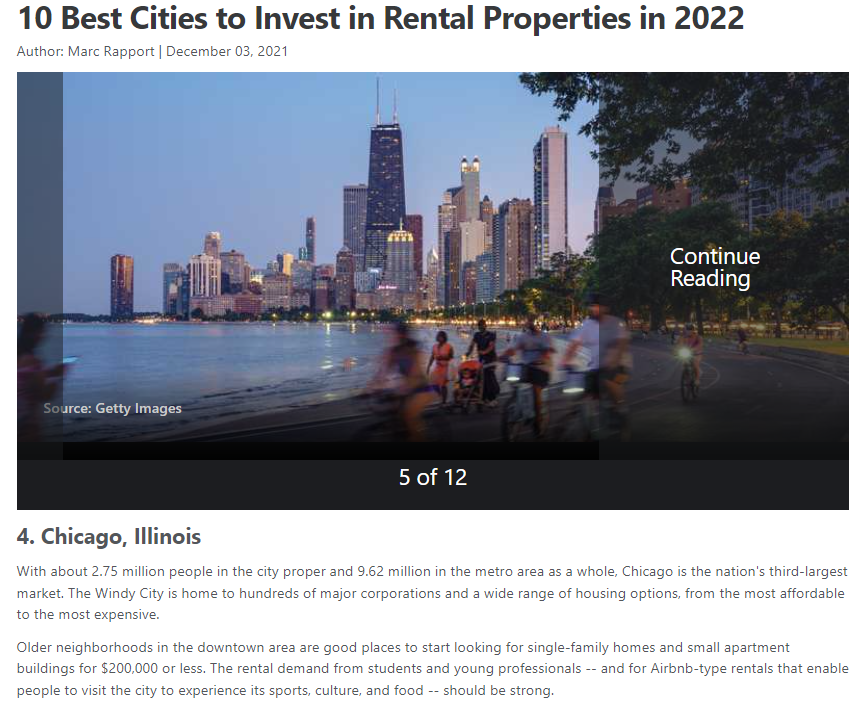

In [ ]:
web_page = requests.get("https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago").text
web_page

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of neighborhoods in Chicago - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6605763f-d345-4286-a535-37fd48e0808f","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_neighborhoods_in_Chicago","wgTitle":"List of neighborhoods in Chicago","wgCurRevisionId":1036977716,"wgRevisionId":1036977716,"wgArticleId":1942395,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Commons category li

In [ ]:
soup = BeautifulSoup(web_page)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of neighborhoods in Chicago - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"6605763f-d345-4286-a535-37fd48e0808f","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_neighborhoods_in_Chicago","wgTitle":"List of neighborhoods in Chicago","wgCurRevisionId":1036977716,"wgRevisionId":1036977716,"wgArticleId":1942395,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Commons category link is 

In [ ]:
table_tag = soup.find("table", class_='wikitable')
table_tag

<table class="wikitable sortable">
<tbody><tr>
<th>Neighborhood</th>
<th>Community area
</th></tr>
<tr>
<td>Albany Park
</td>
<td><a href="/wiki/Albany_Park,_Chicago" title="Albany Park, Chicago">Albany Park</a>
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Altgeld_Gardens,_Chicago" title="Altgeld Gardens, Chicago">Altgeld Gardens</a>
</td>
<td>Riverdale
</td></tr>
<tr>
<td><a href="/wiki/Edgewater,_Chicago#Andersonville" title="Edgewater, Chicago">Andersonville</a>
</td>
<td>Edgewater
</td></tr>
<tr>
<td>Arcadia Terrace
</td>
<td><a href="/wiki/West_Ridge,_Chicago" title="West Ridge, Chicago">West Ridge</a>
</td></tr>
<tr>
<td>Archer Heights
</td>
<td><a href="/wiki/Archer_Heights,_Chicago" title="Archer Heights, Chicago">Archer Heights</a>
</td></tr>
<tr>
<td>Armour Square
</td>
<td><a href="/wiki/Armour_Square,_Chicago" title="Armour Square, Chicago">Armour Square</a>
</td></tr>
<tr>
<td>Ashburn
</td>
<td><a href="/wiki/Ashburn,_Chicago" title="Ashburn, Chicago">Ashburn</a>

In [ ]:
tr_tags = table_tag.find_all("tr")
tr_tags

[<tr>
 <th>Neighborhood</th>
 <th>Community area
 </th></tr>, <tr>
 <td>Albany Park
 </td>
 <td><a href="/wiki/Albany_Park,_Chicago" title="Albany Park, Chicago">Albany Park</a>
 </td></tr>, <tr>
 <td><a class="mw-redirect" href="/wiki/Altgeld_Gardens,_Chicago" title="Altgeld Gardens, Chicago">Altgeld Gardens</a>
 </td>
 <td>Riverdale
 </td></tr>, <tr>
 <td><a href="/wiki/Edgewater,_Chicago#Andersonville" title="Edgewater, Chicago">Andersonville</a>
 </td>
 <td>Edgewater
 </td></tr>, <tr>
 <td>Arcadia Terrace
 </td>
 <td><a href="/wiki/West_Ridge,_Chicago" title="West Ridge, Chicago">West Ridge</a>
 </td></tr>, <tr>
 <td>Archer Heights
 </td>
 <td><a href="/wiki/Archer_Heights,_Chicago" title="Archer Heights, Chicago">Archer Heights</a>
 </td></tr>, <tr>
 <td>Armour Square
 </td>
 <td><a href="/wiki/Armour_Square,_Chicago" title="Armour Square, Chicago">Armour Square</a>
 </td></tr>, <tr>
 <td>Ashburn
 </td>
 <td><a href="/wiki/Ashburn,_Chicago" title="Ashburn, Chicago">Ashburn</a>
 </

In [ ]:
tr_tags[0]

<tr>
<th>Neighborhood</th>
<th>Community area
</th></tr>

In [ ]:
tr_tags.pop(0)

<tr>
<th>Neighborhood</th>
<th>Community area
</th></tr>

In [ ]:
tr_tags[21]

<tr>
<td><a href="/wiki/Lake_View,_Chicago#Boystown" title="Lake View, Chicago">
Northalsted "Boystown"</a>
</td>
<td><a href="/wiki/Lake_View,_Chicago" title="Lake View, Chicago">Lake View</a>
</td></tr>

In [ ]:
chicago_neighbourhoods=[]
for tr_tag in tr_tags:
    td_tags=tr_tag.find_all("td")
    if td_tags[0].text.split('\n')[0] == '': #to handle  'Northalsted "Boystown"',
      chicago_neighbourhoods.append(td_tags[0].text.split('\n')[1])
    else:
      chicago_neighbourhoods.append(td_tags[0].text.split('\n')[0])

chicago_neighbourhoods

['Albany Park',
 'Altgeld Gardens',
 'Andersonville',
 'Arcadia Terrace',
 'Archer Heights',
 'Armour Square',
 'Ashburn',
 'Ashburn Estates',
 'Auburn Gresham',
 'Avalon Park',
 'Avondale',
 'Avondale Gardens',
 'Back of the Yards',
 'Belmont Central',
 'Belmont Gardens',
 'Belmont Heights',
 'Belmont Terrace',
 'Beverly',
 'Beverly View',
 'Beverly Woods',
 'Big Oaks',
 'Northalsted "Boystown"',
 'Bowmanville',
 'Brainerd',
 'Brickyard',
 'Bridgeport',
 'Brighton Park',
 'Bronzeville',
 'Bucktown',
 'Budlong Woods',
 'Buena Park',
 'Burnside',
 'Cabrini–Green',
 'Calumet Heights',
 'Canaryville',
 'Central Station',
 'Chatham',
 'Chicago Lawn',
 'Chinatown',
 'Chrysler Village',
 'Clarendon Park',
 'Clearing East',
 'Clearing West',
 'Cottage Grove Heights',
 'Cragin',
 'Crestline',
 'Dearborn Homes',
 'Dearborn Park',
 'Douglas Park',
 'Dunning',
 'East Beverly',
 'East Chatham',
 'East Garfield Park',
 'East Hyde Park',
 'East Pilsen',
 'East Side',
 'East Village',
 'Eden Green',


In [ ]:
len(chicago_neighbourhoods)

247

In [ ]:
df_chicago = pd.DataFrame(chicago_neighbourhoods, columns=['Neighbourhood'])
df_chicago['City']='chicago'
df_chicago['State']='IL'
df_chicago['Country']='USA'

df_chicago.head()

Neighbourhood     City State Country
0      Albany Park  chicago    IL     USA
1  Altgeld Gardens  chicago    IL     USA
2    Andersonville  chicago    IL     USA
3  Arcadia Terrace  chicago    IL     USA
4   Archer Heights  chicago    IL     USA

## City3: sheffield Data

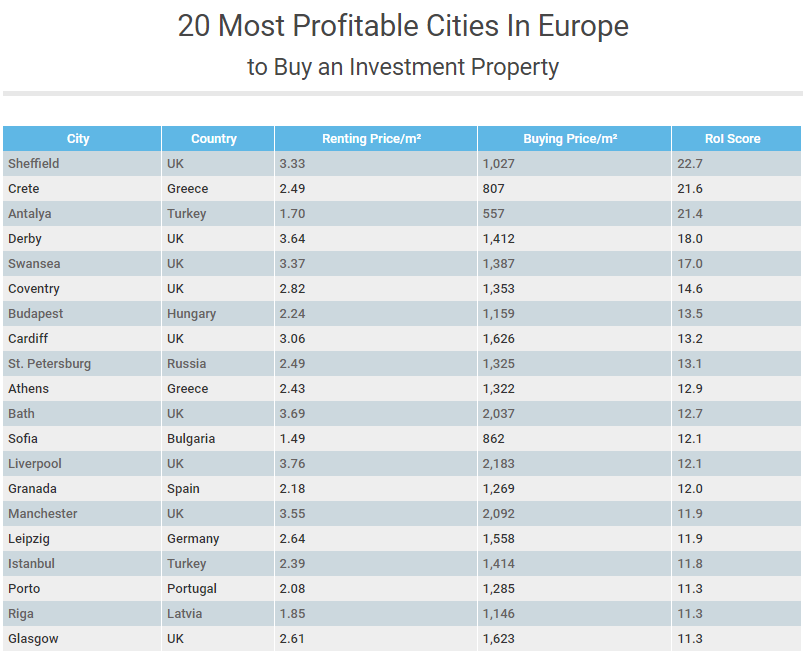

In [ ]:
web_page = requests.get("https://en.wikipedia.org/wiki/Category:Suburbs_of_Sheffield").text
web_page

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Category:Suburbs of Sheffield - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"08e4a9eb-4428-4e1c-af7a-908596b5b9c9","wgCSPNonce":false,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":14,"wgPageName":"Category:Suburbs_of_Sheffield","wgTitle":"Suburbs of Sheffield","wgCurRevisionId":520470674,"wgRevisionId":520470674,"wgArticleId":36975161,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Areas of Sheffield","Suburbs by city"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext",

In [ ]:
soup = BeautifulSoup(web_page)
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Category:Suburbs of Sheffield - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"08e4a9eb-4428-4e1c-af7a-908596b5b9c9","wgCSPNonce":false,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":14,"wgPageName":"Category:Suburbs_of_Sheffield","wgTitle":"Suburbs of Sheffield","wgCurRevisionId":520470674,"wgRevisionId":520470674,"wgArticleId":36975161,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Areas of Sheffield","Suburbs by city"],"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgRel

In [ ]:
div_tag = soup.find(class_= 'mw-content-ltr')
div_tag

<div class="mw-body-content mw-content-ltr" dir="ltr" id="mw-content-text" lang="en"><div class="mw-parser-output">
<!-- 
NewPP limit report
Parsed by mw1385
Cached time: 20211227224641
Cache expiry: 1814400
Reduced expiry: false
Complications: []
CPU time usage: 0.001 seconds
Real time usage: 0.002 seconds
Preprocessor visited node count: 1/1000000
Post‐expand include size: 0/2097152 bytes
Template argument size: 0/2097152 bytes
Highest expansion depth: 1/40
Expensive parser function count: 0/500
Unstrip recursion depth: 0/20
Unstrip post‐expand size: 0/5000000 bytes
Number of Wikibase entities loaded: 0/400
-->
<!--
Transclusion expansion time report (%,ms,calls,template)
100.00%    0.000      1 -total
-->
<!-- Saved in parser cache with key enwiki:pcache:idhash:36975161-0!canonical and timestamp 20211227224641 and revision id 520470674. Serialized with JSON.
 -->
</div><div class="mw-category-generated" dir="ltr" lang="en"><div id="mw-subcategories">
<h2>Subcategories</h2>
<p>This c

In [ ]:
li_tags = div_tag.find_all('li')
li_tags

[<li><div class="CategoryTreeSection"><div class="CategoryTreeItem"><span class="CategoryTreeEmptyBullet"></span> <a href="/wiki/Category:Attercliffe" title="Category:Attercliffe">Attercliffe</a>‎ <span dir="ltr" title="Contains 0 subcategories, 9 pages, and 0 files">(9 P)</span></div><div class="CategoryTreeChildren" style="display:none"></div></div></li>,
 <li><div class="CategoryTreeSection"><div class="CategoryTreeItem"><span class="CategoryTreeEmptyBullet"></span> <a href="/wiki/Category:Heeley" title="Category:Heeley">Heeley</a>‎ <span dir="ltr" title="Contains 0 subcategories, 5 pages, and 0 files">(5 P)</span></div><div class="CategoryTreeChildren" style="display:none"></div></div></li>,
 <li><div class="CategoryTreeSection"><div class="CategoryTreeItem"><span class="CategoryTreeBullet"><span class="CategoryTreeToggle" data-ct-state="collapsed" data-ct-title="Hillsborough,_South_Yorkshire"></span> </span> <a href="/wiki/Category:Hillsborough,_South_Yorkshire" title="Category:Hi

In [ ]:
shef_neighbourhoods=[]
for li_tag in li_tags[4:]:
    td_tags=li_tag.find_all("li")
    shef_neighbourhoods.append(li_tag.text.split(',')[0])

shef_neighbourhoods

['Attercliffe',
 'Beauchief',
 'Bradway',
 'Brincliffe',
 'Broomhill',
 'Burngreave',
 'Carter Knowle',
 'Chapeltown',
 'Crookes',
 'Crookesmoor',
 'Crosspool',
 'Darnall',
 'Endcliffe',
 'Fir Vale',
 'Fulwood',
 'Gleadless',
 'Greenhill',
 'Grenoside',
 'Greystones',
 'Grimesthorpe',
 'Grimesthorpe',
 'Halfway',
 'Handsworth',
 'Heeley',
 'Hemsworth',
 'High Green',
 'Highfield',
 'Hillsborough',
 'Jordanthorpe',
 'Lodge Moor',
 'Longley',
 'Lowfield',
 'Loxley',
 'Malin Bridge',
 'Meersbrook',
 'Middlewood',
 'Millhouses',
 'Neepsend',
 'Nether Edge',
 'Netherthorpe',
 'Norton Lees',
 'Norton',
 'Osgathorpe',
 'Owlerton',
 'Pitsmoor',
 'Ranmoor',
 'Sharrow',
 'Shirecliffe',
 'Stannington',
 'Tinsley',
 'Totley',
 'Upperthorpe',
 'Wadsley',
 'Wadsley Bridge',
 'Walkley',
 'West End',
 'Whirlow',
 'Wisewood',
 'Woodseats']

In [ ]:
len(shef_neighbourhoods)

59

In [ ]:
df_shef = pd.DataFrame(shef_neighbourhoods, columns=['Neighbourhood'])
df_shef['City']='Sheffield'
df_shef['State']='South Yorkshire'
df_shef['Country']='ENGLAND'

df_shef.head()

Neighbourhood       City            State  Country
0   Attercliffe  Sheffield  South Yorkshire  ENGLAND
1     Beauchief  Sheffield  South Yorkshire  ENGLAND
2       Bradway  Sheffield  South Yorkshire  ENGLAND
3    Brincliffe  Sheffield  South Yorkshire  ENGLAND
4     Broomhill  Sheffield  South Yorkshire  ENGLAND

## Merge 3 cities in one DataFrame

In [ ]:
df = pd.concat([df_cairo, df_chicago, df_shef], ignore_index=True)
df

Neighbourhood       City            State  Country
0        Abbassia      cairo            cairo    EGYPT
1       Ain Shams      cairo            cairo    EGYPT
2        Azbakeya      cairo            cairo    EGYPT
3     Bab al-Louq      cairo            cairo    EGYPT
4          Boulaq      cairo            cairo    EGYPT
..            ...        ...              ...      ...
335       Walkley  Sheffield  South Yorkshire  ENGLAND
336      West End  Sheffield  South Yorkshire  ENGLAND
337       Whirlow  Sheffield  South Yorkshire  ENGLAND
338      Wisewood  Sheffield  South Yorkshire  ENGLAND
339     Woodseats  Sheffield  South Yorkshire  ENGLAND

[340 rows x 4 columns]

In [ ]:
#save consolidated df into an excel file
df.to_excel("Neighbourhoods.xlsx", index=False)

# **3. Getting Geocodes**

## Check Neighbourhoods Coordinates

In [ ]:
#read consolidated df from the excel file
df = pd.read_excel("Neighbourhoods.xlsx")

In [ ]:
df.head()

Neighbourhood   City  State Country
0      Abbassia  cairo  cairo   EGYPT
1     Ain Shams  cairo  cairo   EGYPT
2      Azbakeya  cairo  cairo   EGYPT
3   Bab al-Louq  cairo  cairo   EGYPT
4        Boulaq  cairo  cairo   EGYPT

In [ ]:
df.shape

(340, 4)

In [ ]:
df['Neighbourhood'][100]

'Ford City'

In [ ]:
#test df.iterrows
for index, data in df.iterrows():
    print(index)
    print("---")
    print(data)
    print("---")
    print(data['Neighbourhood'] + ', ' + data['City'] + ', ' + data['State']+', ' + data['Country'])
    break

0
---
Neighbourhood    Abbassia
City                cairo
State               cairo
Country             EGYPT
Name: 0, dtype: object
---
Abbassia, cairo, cairo, EGYPT


In [ ]:
latitude=[]
longitude=[]

for index, data in df.iterrows():
    address = data['Neighbourhood'] + ', ' + data['City'] + ', ' + data['State']+', ' + data['Country']
    
    try:
        geolocator = Nominatim(user_agent='Youssef')
        location = geolocator.geocode(address)
    except GeocoderTimedOut as err:
        print(err)
        latitude.append('timeout')
        longitude.append('timeout')
    else:
        if location is not None:
            latitude.append(location.latitude)
            longitude.append(location.longitude)
            print('The geograpical coordinate of {} are {}, {}.'.format(address, location.latitude, location.longitude))
        else:
            latitude.append(None)
            longitude.append(None)
            print('None Coordinates for {}'.format(address))
        time.sleep(2.0)

print("=================================")
print("=================================")
print("Total Latitude: ", len(latitude))
print("Total Longitude: ", len(longitude))

The geograpical coordinate of Abbassia, cairo, cairo, EGYPT are 30.0727858, 31.2840893.
The geograpical coordinate of Ain Shams, cairo, cairo, EGYPT are 30.1304761, 31.3167491.
The geograpical coordinate of Azbakeya, cairo, cairo, EGYPT are 30.0538891, 31.2454725.
The geograpical coordinate of Bab al-Louq, cairo, cairo, EGYPT are 30.0442714, 31.23982923712642.
The geograpical coordinate of Boulaq, cairo, cairo, EGYPT are 30.0630926, 31.228925529262085.
None Coordinates for City of the Dead (Cairo), cairo, cairo, EGYPT
The geograpical coordinate of Coptic Cairo, cairo, cairo, EGYPT are 30.006477699999998, 31.231841015688115.
None Coordinates for Daher, Egypt, cairo, cairo, EGYPT
The geograpical coordinate of Downtown Cairo, cairo, cairo, EGYPT are 30.0887612, 31.2898195.
The geograpical coordinate of El Manial, cairo, cairo, EGYPT are 30.0256312, 31.2260001.
The geograpical coordinate of El Marg, cairo, cairo, EGYPT are 30.1392826, 31.3244931.
The geograpical coordinate of El Matareya, 

In [ ]:
df['Latitude'] = latitude
df['Longitude'] = longitude

df

Neighbourhood       City            State  Country Latitude Longitude
0        Abbassia      cairo            cairo    EGYPT  30.0728   31.2841
1       Ain Shams      cairo            cairo    EGYPT  30.1305   31.3167
2        Azbakeya      cairo            cairo    EGYPT  30.0539   31.2455
3     Bab al-Louq      cairo            cairo    EGYPT  30.0443   31.2398
4          Boulaq      cairo            cairo    EGYPT  30.0631   31.2289
..            ...        ...              ...      ...      ...       ...
335       Walkley  Sheffield  South Yorkshire  ENGLAND  53.3945  -1.50242
336      West End  Sheffield  South Yorkshire  ENGLAND  timeout   timeout
337       Whirlow  Sheffield  South Yorkshire  ENGLAND  53.3392  -1.53368
338      Wisewood  Sheffield  South Yorkshire  ENGLAND  53.4049   -1.5198
339     Woodseats  Sheffield  South Yorkshire  ENGLAND  53.3428  -1.47729

[340 rows x 6 columns]

In [ ]:
print("Neighbourhoods with None Coordinates: ", sum(df['Latitude'].isna()))
print("Neighbourhoods with Timeout Error: ", sum(df['Latitude']=='timeout'))

Neighbourhoods with None Coordinates:  46
Neighbourhoods with Timeout Error:  1


In [ ]:
df.to_excel("Neighbourhoods_Geolocations.xlsx", index=False)

In [ ]:
(df[df['Latitude'].isna()]['City']).value_counts()

chicago    38
cairo       8
Name: City, dtype: int64

## Check Neighbourhoods with None Coordinates

In [ ]:
df = pd.read_excel("Neighbourhoods_Geolocations.xlsx")

In [ ]:
df[df['Latitude'].isnull()]

Neighbourhood     City  ... Latitude Longitude
5               City of the Dead (Cairo)    cairo  ...      NaN       NaN
7                           Daher, Egypt    cairo  ...      NaN       NaN
12                             El Qobbah    cairo  ...      NaN       NaN
15                          El Sakkakini    cairo  ...      NaN       NaN
16                      Ezbet El Haggana    cairo  ...      NaN       NaN
18                               Faggala    cairo  ...      NaN       NaN
28        Shubra (administrative region)    cairo  ...      NaN       NaN
31                        Wagh El Birket    cairo  ...      NaN       NaN
37                       Arcadia Terrace  chicago  ...      NaN       NaN
41                       Ashburn Estates  chicago  ...      NaN       NaN
48                       Belmont Gardens  chicago  ...      NaN       NaN
49                       Belmont Heights  chicago  ...      NaN       NaN
50                       Belmont Terrace  chicago  ...      NaN       NaN
52                          Beverly View  chicago  ...      NaN       NaN
54                              Big Oaks  chicago  ...      NaN       NaN
73                      Chrysler Village  chicago  ...      NaN       NaN
84                          East Beverly  chicago  ...      NaN       NaN
87                        East Hyde Park  chicago  ...      NaN       NaN
88                           East Pilsen  chicago  ...      NaN       NaN
91                            Eden Green  chicago  ...      NaN       NaN
95                        Edgewater Glen  chicago  ...      NaN       NaN
99                            Fifth City  chicago  ...      NaN       NaN
103                Fulton River District  chicago  ...      NaN       NaN
106                              The Gap  chicago  ...      NaN       NaN
112                       Graceland West  chicago  ...      NaN       NaN
130                         Irving Woods  chicago  ...      NaN       NaN
147  Legends South (Robert Taylor Homes)  chicago  ...      NaN       NaN
155                       Longwood Manor  chicago  ...      NaN       NaN
171                         New Eastside  chicago  ...      NaN       NaN
202                      Polish Downtown  chicago  ...      NaN       NaN
211                       Ranch Triangle  chicago  ...      NaN       NaN
217                         River's Edge  chicago  ...      NaN       NaN
224                            St. Ben's  chicago  ...      NaN       NaN
227                     Schorsch Village  chicago  ...      NaN       NaN
229                  Sheffield Neighbors  chicago  ...      NaN       NaN
231            Sheridan Station Corridor  chicago  ...      NaN       NaN
238                South East Ravenswood  chicago  ...      NaN       NaN
243                     Stateway Gardens  chicago  ...      NaN       NaN
246                      Talley's Corner  chicago  ...      NaN       NaN
247                           Tri-Taylor  chicago  ...      NaN       NaN
252                            The Villa  chicago  ...      NaN       NaN
254                            Wacławowo  chicago  ...      NaN       NaN
260                    West Chesterfield  chicago  ...      NaN       NaN
261                          West DePaul  chicago  ...      NaN       NaN
274                        West Woodlawn  chicago  ...      NaN       NaN
279                 Wrightwood Neighbors  chicago  ...      NaN       NaN

[46 rows x 6 columns]

In [ ]:
latitude_nan=[]
longitude_nan=[]

for index, data in df[df['Latitude'].isnull()].iterrows():
    address = data['Neighbourhood'] + ', ' + data['City']
    
    try:
        geolocator = Nominatim(user_agent='Markov_Applied_DS')
        location = geolocator.geocode(address)
    except GeocoderTimedOut as err:
        print(err)
        latitude_nan.append('timeout')
        longitude_nan.append('timeout')
    else:
        if location is not None:
            latitude_nan.append(location.latitude)
            longitude_nan.append(location.longitude)
            print('The geograpical coordinate of {} are {}, {}.'.format(address, location.latitude, location.longitude))
        else:
            latitude_nan.append(None)
            longitude_nan.append(None)
            print('None Coordinates for {}'.format(address))
        time.sleep(2.0)

print("=================================")
print("=================================")
print("Total Latitude: ", len(latitude_nan))
print("Total Longitude: ", len(longitude_nan))

None Coordinates for City of the Dead (Cairo), cairo
The geograpical coordinate of Daher, Egypt, cairo are 30.06207115, 31.2548915439843.
None Coordinates for El Qobbah, cairo
None Coordinates for El Sakkakini, cairo
None Coordinates for Ezbet El Haggana, cairo
The geograpical coordinate of Faggala, cairo are 29.9947133, 32.5177023.
None Coordinates for Shubra (administrative region), cairo
None Coordinates for Wagh El Birket, cairo
The geograpical coordinate of Arcadia Terrace, chicago are 41.9110839, -87.6324747.
None Coordinates for Ashburn Estates, chicago
None Coordinates for Belmont Gardens, chicago
None Coordinates for Belmont Heights, chicago
None Coordinates for Belmont Terrace, chicago
None Coordinates for Beverly View, chicago
The geograpical coordinate of Big Oaks, chicago are 41.5390034, -88.5811599.
None Coordinates for Chrysler Village, chicago
The geograpical coordinate of East Beverly, chicago are 41.7214831, -87.66592258004567.
The geograpical coordinate of East Hyde 

In [ ]:
#test check null
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Length: 340, dtype: bool

In [ ]:
df_nan = pd.DataFrame(index=df.index[df.isnull().any(axis=1)], data=list(zip(latitude_nan, longitude_nan)), columns=['Latitude', 'Longitude'])

In [ ]:
df_nan

Latitude Longitude
5       None      None
7    30.0621   31.2549
12      None      None
15      None      None
16      None      None
18   29.9947   32.5177
28      None      None
31      None      None
37   41.9111  -87.6325
41      None      None
48      None      None
49      None      None
50      None      None
52      None      None
54    41.539  -88.5812
73      None      None
84   41.7215  -87.6659
87   41.6945  -87.6065
88   41.8554  -87.6517
91      None      None
95      None      None
99   14.5898   120.967
103     None      None
106     None      None
112     None      None
130     None      None
147     None      None
155     None      None
171     None      None
202  41.9036  -87.6672
211     None      None
217     None      None
224  timeout   timeout
227  41.9473  -87.7792
229     None      None
231     None      None
238     None      None
243     None      None
246     None      None
247     None      None
252  timeout   timeout
254     None      None
260     None      None
261   41.955  -87.6873
274  41.7762   -87.592
279     None      None

In [ ]:
df = df.fillna(df_nan)
df

Neighbourhood       City            State  Country Latitude Longitude
0        Abbassia      cairo            cairo    EGYPT  30.0728   31.2841
1       Ain Shams      cairo            cairo    EGYPT  30.1305   31.3167
2        Azbakeya      cairo            cairo    EGYPT  30.0539   31.2455
3     Bab al-Louq      cairo            cairo    EGYPT  30.0443   31.2398
4          Boulaq      cairo            cairo    EGYPT  30.0631   31.2289
..            ...        ...              ...      ...      ...       ...
335       Walkley  Sheffield  South Yorkshire  ENGLAND  53.3945  -1.50242
336      West End  Sheffield  South Yorkshire  ENGLAND  timeout   timeout
337       Whirlow  Sheffield  South Yorkshire  ENGLAND  53.3392  -1.53368
338      Wisewood  Sheffield  South Yorkshire  ENGLAND  53.4049   -1.5198
339     Woodseats  Sheffield  South Yorkshire  ENGLAND  53.3428  -1.47729

[340 rows x 6 columns]

In [ ]:
df[df['Latitude'].isnull()]

Neighbourhood     City  ... Latitude Longitude
5               City of the Dead (Cairo)    cairo  ...     None      None
12                             El Qobbah    cairo  ...     None      None
15                          El Sakkakini    cairo  ...     None      None
16                      Ezbet El Haggana    cairo  ...     None      None
28        Shubra (administrative region)    cairo  ...     None      None
31                        Wagh El Birket    cairo  ...     None      None
41                       Ashburn Estates  chicago  ...     None      None
48                       Belmont Gardens  chicago  ...     None      None
49                       Belmont Heights  chicago  ...     None      None
50                       Belmont Terrace  chicago  ...     None      None
52                          Beverly View  chicago  ...     None      None
73                      Chrysler Village  chicago  ...     None      None
91                            Eden Green  chicago  ...     None      None
95                        Edgewater Glen  chicago  ...     None      None
103                Fulton River District  chicago  ...     None      None
106                              The Gap  chicago  ...     None      None
112                       Graceland West  chicago  ...     None      None
130                         Irving Woods  chicago  ...     None      None
147  Legends South (Robert Taylor Homes)  chicago  ...     None      None
155                       Longwood Manor  chicago  ...     None      None
171                         New Eastside  chicago  ...     None      None
211                       Ranch Triangle  chicago  ...     None      None
217                         River's Edge  chicago  ...     None      None
229                  Sheffield Neighbors  chicago  ...     None      None
231            Sheridan Station Corridor  chicago  ...     None      None
238                South East Ravenswood  chicago  ...     None      None
243                     Stateway Gardens  chicago  ...     None      None
246                      Talley's Corner  chicago  ...     None      None
247                           Tri-Taylor  chicago  ...     None      None
254                            Wacławowo  chicago  ...     None      None
260                    West Chesterfield  chicago  ...     None      None
279                 Wrightwood Neighbors  chicago  ...     None      None

[32 rows x 6 columns]

In [ ]:
print("Neighbourhoods with None Coordinates: ", sum(df['Latitude'].isna()))

Neighbourhoods with None Coordinates:  32


In [ ]:
df.to_excel("Neighbourhoods_Geolocations_v2.xlsx", index=False)

## Another Check Neighbourhoods with None Coordinates **"may not be correct all the time "**

In [ ]:
df = pd.read_excel("Neighbourhoods_Geolocations_v2.xlsx")

In [ ]:
df[df['Latitude'].isnull()]

In [ ]:
latitude_nan=[]
longitude_nan=[]

for index, data in df[df['Latitude'].isnull()].iterrows():
    address = data['Neighbourhood'].split(" ")[0] + ', ' + data['City']
    
    try:
        geolocator = Nominatim(user_agent='Markov_Applied_DS')
        location = geolocator.geocode(address)
    except GeocoderTimedOut as err:
        print(err)
        latitude_nan.append('timeout')
        longitude_nan.append('timeout')
    else:
        if location is not None:
            latitude_nan.append(location.latitude)
            longitude_nan.append(location.longitude)
            print('The geograpical coordinate of {} are {}, {}.'.format(address, location.latitude, location.longitude))
        else:
            latitude_nan.append(None)
            longitude_nan.append(None)
            print('None Coordinates for {}'.format(address))
        time.sleep(2.0)

print("=================================")
print("=================================")
print("Total Latitude: ", len(latitude_nan))
print("Total Longitude: ", len(longitude_nan))

In [ ]:
#test check null
df.isnull().any(axis=1)

In [ ]:
df_nan = pd.DataFrame(index=df.index[df.isnull().any(axis=1)], data=list(zip(latitude_nan, longitude_nan)), columns=['Latitude', 'Longitude'])

In [ ]:
df_nan

In [ ]:
df = df.fillna(df_nan)
df

In [ ]:
df[df['Latitude'].isnull()]

In [ ]:
print("Neighbourhoods with None Coordinates: ", sum(df['Latitude'].isna()))

In [ ]:
df.to_excel("Neighbourhoods_Geolocations_v3.xlsx", index=False)

## Check Last Neighbourhoods with None Coordinates

In [ ]:
df = pd.read_excel("Neighbourhoods_Geolocations_v2.xlsx")

In [ ]:
df[df['Latitude'].isnull()]

Neighbourhood     City  ... Latitude Longitude
5               City of the Dead (Cairo)    cairo  ...      NaN       NaN
12                             El Qobbah    cairo  ...      NaN       NaN
15                          El Sakkakini    cairo  ...      NaN       NaN
16                      Ezbet El Haggana    cairo  ...      NaN       NaN
28        Shubra (administrative region)    cairo  ...      NaN       NaN
31                        Wagh El Birket    cairo  ...      NaN       NaN
41                       Ashburn Estates  chicago  ...      NaN       NaN
48                       Belmont Gardens  chicago  ...      NaN       NaN
49                       Belmont Heights  chicago  ...      NaN       NaN
50                       Belmont Terrace  chicago  ...      NaN       NaN
52                          Beverly View  chicago  ...      NaN       NaN
73                      Chrysler Village  chicago  ...      NaN       NaN
91                            Eden Green  chicago  ...      NaN       NaN
95                        Edgewater Glen  chicago  ...      NaN       NaN
103                Fulton River District  chicago  ...      NaN       NaN
106                              The Gap  chicago  ...      NaN       NaN
112                       Graceland West  chicago  ...      NaN       NaN
130                         Irving Woods  chicago  ...      NaN       NaN
147  Legends South (Robert Taylor Homes)  chicago  ...      NaN       NaN
155                       Longwood Manor  chicago  ...      NaN       NaN
171                         New Eastside  chicago  ...      NaN       NaN
211                       Ranch Triangle  chicago  ...      NaN       NaN
217                         River's Edge  chicago  ...      NaN       NaN
229                  Sheffield Neighbors  chicago  ...      NaN       NaN
231            Sheridan Station Corridor  chicago  ...      NaN       NaN
238                South East Ravenswood  chicago  ...      NaN       NaN
243                     Stateway Gardens  chicago  ...      NaN       NaN
246                      Talley's Corner  chicago  ...      NaN       NaN
247                           Tri-Taylor  chicago  ...      NaN       NaN
254                            Wacławowo  chicago  ...      NaN       NaN
260                    West Chesterfield  chicago  ...      NaN       NaN
279                 Wrightwood Neighbors  chicago  ...      NaN       NaN

[32 rows x 6 columns]

In [ ]:
df_neigh = df.copy().set_index('Neighbourhood')
df_neigh

City            State  Country Latitude Longitude
Neighbourhood                                                        
Abbassia           cairo            cairo    EGYPT  30.0728   31.2841
Ain Shams          cairo            cairo    EGYPT  30.1305   31.3167
Azbakeya           cairo            cairo    EGYPT  30.0539   31.2455
Bab al-Louq        cairo            cairo    EGYPT  30.0443   31.2398
Boulaq             cairo            cairo    EGYPT  30.0631   31.2289
...                  ...              ...      ...      ...       ...
Walkley        Sheffield  South Yorkshire  ENGLAND  53.3945  -1.50242
West End       Sheffield  South Yorkshire  ENGLAND  timeout   timeout
Whirlow        Sheffield  South Yorkshire  ENGLAND  53.3392  -1.53368
Wisewood       Sheffield  South Yorkshire  ENGLAND  53.4049   -1.5198
Woodseats      Sheffield  South Yorkshire  ENGLAND  53.3428  -1.47729

[340 rows x 5 columns]

In [ ]:
df_neigh.loc['City of the Dead (Cairo)', 'Latitude'] =30.04339705763095
df_neigh.loc['City of the Dead (Cairo)', 'Longitude'] = 31.27239191743176

df_neigh.loc['El Qobbah', 'Latitude'] =30.087620079641002
df_neigh.loc['El Qobbah', 'Longitude'] = 31.286295894148047

df_neigh.loc['El Sakkakini', 'Latitude'] =30.064075344659962
df_neigh.loc['El Sakkakini', 'Longitude'] =  31.26611429662371

df_neigh.loc['Ezbet El Haggana', 'Latitude'] =30.068505684855868
df_neigh.loc['Ezbet El Haggana', 'Longitude'] =   31.40411676772352

df_neigh.loc['Ashburn Estates', 'Latitude'] =41.746838664745816
df_neigh.loc['Ashburn Estates', 'Longitude'] = -87.70834446623708

df_neigh.loc['Belmont Gardens', 'Latitude'] =41.93201065549951
df_neigh.loc['Belmont Gardens', 'Longitude'] =-87.73440239025658

df_neigh.loc['Belmont Heights', 'Latitude'] =41.94476293847974
df_neigh.loc['Belmont Heights', 'Longitude'] =-87.81592271011039

df_neigh.loc['Belmont Terrace', 'Latitude'] =41.94133303859172
df_neigh.loc['Belmont Terrace', 'Longitude'] =-87.83173981543843

df_neigh.loc['Beverly View', 'Latitude'] =41.74761829634968
df_neigh.loc['Beverly View', 'Longitude'] =-87.68063483650465

df_neigh.loc['Chrysler Village', 'Latitude'] =41.77651247718871
df_neigh.loc['Chrysler Village', 'Longitude'] = -87.75212100404946

df_neigh.loc['Eden Green', 'Latitude'] =41.65448090476349
df_neigh.loc['Eden Green', 'Longitude'] =  -87.61556980881203

df_neigh.loc['Edgewater Glen', 'Latitude'] =41.993113039687444
df_neigh.loc['Edgewater Glen', 'Longitude'] =  -87.6652174926963

df_neigh.loc['Fulton River District', 'Latitude'] =41.88959898251301
df_neigh.loc['Fulton River District', 'Longitude'] =  -87.64302494086103

df_neigh.loc['The Gap', 'Latitude'] =41.83476525441543
df_neigh.loc['The Gap', 'Longitude'] = -87.62002223527779

df_neigh.loc['Graceland West', 'Latitude'] =41.93534029102524
df_neigh.loc['Graceland West', 'Longitude'] = -87.66952455151137

df_neigh.loc['Irving Woods', 'Latitude'] =41.94867803039297
df_neigh.loc['Irving Woods', 'Longitude'] =-87.83099703167223

df_neigh.loc['Legends South (Robert Taylor Homes)', 'Latitude'] =41.8071021195437
df_neigh.loc['Legends South (Robert Taylor Homes)', 'Longitude'] = -87.62846035331457

df_neigh.loc['Longwood Manor', 'Latitude'] =41.71881754780594
df_neigh.loc['Longwood Manor', 'Longitude'] = -87.64624800787705

df_neigh.loc['New Eastside', 'Latitude'] =41.886539668695534
df_neigh.loc['New Eastside', 'Longitude'] = -87.61846590116211

df_neigh.loc['Ranch Triangle', 'Latitude'] =41.91484048486217
df_neigh.loc['Ranch Triangle', 'Longitude'] = -87.6538342681164

df_neigh.loc["River's Edge", 'Latitude'] =41.836299940591175
df_neigh.loc["River's Edge", 'Longitude'] = -87.66554309999916

df_neigh.loc["Sheffield Neighbors", 'Latitude'] =41.92195333051238
df_neigh.loc["Sheffield Neighbors", 'Longitude'] =  -87.65774485666817

df_neigh.loc["Sheridan Station Corridor", 'Latitude'] =41.95391258891795
df_neigh.loc["Sheridan Station Corridor", 'Longitude'] = -87.65467583677754

df_neigh.loc["South East Ravenswood", 'Latitude'] =41.968931867531964
df_neigh.loc["South East Ravenswood", 'Longitude'] = -87.67473932906844

df_neigh.loc["Stateway Gardens", 'Latitude'] =41.8273507169177
df_neigh.loc["Stateway Gardens", 'Longitude'] =  -87.62828357733733

df_neigh.loc["Tri-Taylor", 'Latitude'] =41.87124446389731
df_neigh.loc["Tri-Taylor", 'Longitude'] =-87.68441939602897

df_neigh.loc["West Chesterfield", 'Latitude'] =41.72914029551654
df_neigh.loc["West Chesterfield", 'Longitude'] =-87.61934103621036

df_neigh.loc["Wrightwood Neighbors", 'Latitude'] =41.928790599292746
df_neigh.loc["Wrightwood Neighbors", 'Longitude'] =-87.65629643872039

In [ ]:
df_neigh.reset_index(inplace=True)
df_neigh

Neighbourhood       City            State  Country Latitude Longitude
0        Abbassia      cairo            cairo    EGYPT  30.0728   31.2841
1       Ain Shams      cairo            cairo    EGYPT  30.1305   31.3167
2        Azbakeya      cairo            cairo    EGYPT  30.0539   31.2455
3     Bab al-Louq      cairo            cairo    EGYPT  30.0443   31.2398
4          Boulaq      cairo            cairo    EGYPT  30.0631   31.2289
..            ...        ...              ...      ...      ...       ...
335       Walkley  Sheffield  South Yorkshire  ENGLAND  53.3945  -1.50242
336      West End  Sheffield  South Yorkshire  ENGLAND  timeout   timeout
337       Whirlow  Sheffield  South Yorkshire  ENGLAND  53.3392  -1.53368
338      Wisewood  Sheffield  South Yorkshire  ENGLAND  53.4049   -1.5198
339     Woodseats  Sheffield  South Yorkshire  ENGLAND  53.3428  -1.47729

[340 rows x 6 columns]

### drop 4 neighbourhoods didn't found 

In [ ]:
df_neigh=df_neigh.dropna()

In [ ]:
df_neigh[df_neigh['Latitude'].isna()]

Empty DataFrame
Columns: [Neighbourhood, City, State, Country, Latitude, Longitude]
Index: []

In [ ]:
# df_neigh.drop(df_neigh[df_neigh['Latitude']=="timeout"].index,inplace = True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_neigh.to_excel("/content/drive/MyDrive/Neighbourhoods_Geolocations_final.xlsx", index=False)

# **4. Drawing Neighbourhoods/Cities Maps**

## Cities Map

In [ ]:
df_map = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_Geolocations_final.xlsx")

In [ ]:
df_map

Neighbourhood       City            State  Country   Latitude  Longitude
0          Abbassia      cairo            cairo    EGYPT  30.072786  31.284089
1         Ain Shams      cairo            cairo    EGYPT  30.130476  31.316749
2          Azbakeya      cairo            cairo    EGYPT  30.053889  31.245473
3       Bab al-Louq      cairo            cairo    EGYPT  30.044271  31.239829
4            Boulaq      cairo            cairo    EGYPT  30.063093  31.228926
..              ...        ...              ...      ...        ...        ...
328  Wadsley Bridge  Sheffield  South Yorkshire  ENGLAND  53.417530  -1.500355
329         Walkley  Sheffield  South Yorkshire  ENGLAND  53.394465  -1.502423
330         Whirlow  Sheffield  South Yorkshire  ENGLAND  53.339154  -1.533676
331        Wisewood  Sheffield  South Yorkshire  ENGLAND  53.404924  -1.519804
332       Woodseats  Sheffield  South Yorkshire  ENGLAND  53.342792  -1.477287

[333 rows x 6 columns]

In [ ]:
df_map.groupby('City').count()

Neighbourhood  State  Country  Latitude  Longitude
City                                                         
Sheffield             58     58       58        58         58
cairo                 32     32       32        32         32
chicago              243    243      243       243        243

In [ ]:
city_loca=[]
for city in list(df_map.groupby('City').count().index):
    geolocator = Nominatim(user_agent='Markov_Applied_DS')
    loca = geolocator.geocode(city)
    city_loca.append([city, loca.longitude, loca.latitude])
    #time.sleep(2.0)

city_loca

[['Sheffield', -1.4702278, 53.3806626],
 ['cairo', 31.2357257, 30.0443879],
 ['chicago', -87.6244212, 41.8755616]]

In [ ]:
df_city = pd.DataFrame(data=city_loca, columns=['City','Longitude', 'Latitude'])
df_city

City  Longitude   Latitude
0  Sheffield  -1.470228  53.380663
1      cairo  31.235726  30.044388
2    chicago -87.624421  41.875562

In [ ]:
city_map = folium.Map(location = [0,0], zoom_start = 2)

#add markers to the cities
for lat, lng, label in zip(df_city['Latitude'], df_city['Longitude'], df_city['City']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(city_map) 
         
city_map

## Neighbourhoods Maps

In [ ]:
#test get city lat
df_city.loc[df_city['City']=="cairo",'Latitude'].values[0]

30.0443879

In [ ]:
def generate_map (city, zoom):

    map = folium.Map(location=[df_city.loc[df_city['City']==city,'Latitude'].values[0],df_city.loc[df_city['City']==city,'Longitude'].values[0]], zoom_start=zoom)
    #add markers to the cities
    i=0
    for lat, lng, label in zip(df_map.loc[df_map['City']==city,'Latitude'], df_map.loc[df_map['City']==city,'Longitude'], df_map.loc[df_map['City']==city,'Neighbourhood']):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7).add_to(map)
        # i+=1
        # if i==150:
        #   break

    return map

In [ ]:
map_cairo = generate_map('cairo', 11)
map_cairo

In [ ]:
map_chicago = generate_map('chicago', 11)
# map_chicago.save("index.html")
map_chicago

In [ ]:
map_shef = generate_map('Sheffield', 11)
map_shef

# **5. Foursquare Location Services API**

## Getting Venues from Foursquare

In [ ]:
LIMIT = 50

#### API Test Request

In [ ]:
test_lat = '30.0492'
test_lng = '30.9762'
test_radius = 1000

In [ ]:
# fsq353aCRvW5WO5ppiZkQJu8yr78b6jW+Nq420cSwcfV+hk=

In [ ]:
import requests

testurl = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius={}&limit={}".format(
    test_lat, 
    test_lng, 
    test_radius, 
    LIMIT)

headers = {
    "Accept": "application/json",
    "Authorization": "fsq353aCRvW5WO5ppiZkQJu8yr78b6jW+Nq420cSwcfV+hk="
}

response = requests.request("GET", testurl, headers=headers).json()

response

{'context': {'geo_bounds': {'circle': {'center': {'latitude': 30.0492,
     'longitude': 30.9762},
    'radius': 1000}}},
 'results': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
      'suffix': '.png'},
     'id': 13035,
     'name': 'Coffee Shop'}],
   'chains': [],
   'distance': 1224,
   'fsq_id': '613518f1de20551acc5eba67',
   'geocodes': {'main': {'latitude': 30.038296, 'longitude': 30.978042}},
   'location': {'address': 'The Gate Plaza',
    'country': 'EG',
    'cross_street': "El Amal St - 8'th District",
    'locality': 'El-Sheikh Zayed City',
    'postcode': '12556',
    'region': 'Muḩāfaz̧at al Jīzah'},
   'name': 'كوستا كوفي',
   'related_places': {},
   'timezone': 'Africa/Cairo'},
  {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
      'suffix': '.png'},
     'id': 13145,
     'name': 'Fast Food Restaurant'},
    {'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/foo

In [ ]:
requests.request("GET", testurl, headers=headers).json()['results']


[{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
     'suffix': '.png'},
    'id': 13035,
    'name': 'Coffee Shop'}],
  'chains': [],
  'distance': 1224,
  'fsq_id': '613518f1de20551acc5eba67',
  'geocodes': {'main': {'latitude': 30.038296, 'longitude': 30.978042}},
  'location': {'address': 'The Gate Plaza',
   'country': 'EG',
   'cross_street': "El Amal St - 8'th District",
   'locality': 'El-Sheikh Zayed City',
   'postcode': '12556',
   'region': 'Muḩāfaz̧at al Jīzah'},
  'name': 'كوستا كوفي',
  'related_places': {},
  'timezone': 'Africa/Cairo'},
 {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
     'suffix': '.png'},
    'id': 13145,
    'name': 'Fast Food Restaurant'},
   {'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
     'suffix': '.png'},
    'id': 13064,
    'name': 'Pizzeria'}],
  'chains': [{'id': 'ab4a6b90-d68a-012e-5619-003048cad9da',
    'name': 'Pizz

In [ ]:
requests.request("GET", testurl, headers=headers).json()['results'][0]

{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
    'suffix': '.png'},
   'id': 13035,
   'name': 'Coffee Shop'}],
 'chains': [],
 'distance': 1224,
 'fsq_id': '613518f1de20551acc5eba67',
 'geocodes': {'main': {'latitude': 30.038296, 'longitude': 30.978042}},
 'location': {'address': 'The Gate Plaza',
  'country': 'EG',
  'cross_street': "El Amal St - 8'th District",
  'locality': 'El-Sheikh Zayed City',
  'postcode': '12556',
  'region': 'Muḩāfaz̧at al Jīzah'},
 'name': 'كوستا كوفي',
 'related_places': {},
 'timezone': 'Africa/Cairo'}

In [ ]:
requests.request("GET", testurl, headers=headers).json()['results'][0]['name']

'كوستا كوفي'

In [ ]:
requests.request("GET", testurl, headers=headers).json()['results'][0]['geocodes']['main']['latitude']

30.038296

In [ ]:
requests.request("GET", testurl, headers=headers).json()['results'][0]['categories'][0]['name']

'Coffee Shop'

In [ ]:
list=[]
for i in requests.request("GET", testurl, headers=headers).json()['results'] :
  if i['categories'][0]['name']:
    list.append(i)

#### API Venues Request

In [ ]:
df_neigh = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_Geolocations_final.xlsx")
df_neigh

Neighbourhood       City            State  Country   Latitude  Longitude
0          Abbassia      cairo            cairo    EGYPT  30.072786  31.284089
1         Ain Shams      cairo            cairo    EGYPT  30.130476  31.316749
2          Azbakeya      cairo            cairo    EGYPT  30.053889  31.245473
3       Bab al-Louq      cairo            cairo    EGYPT  30.044271  31.239829
4            Boulaq      cairo            cairo    EGYPT  30.063093  31.228926
..              ...        ...              ...      ...        ...        ...
328  Wadsley Bridge  Sheffield  South Yorkshire  ENGLAND  53.417530  -1.500355
329         Walkley  Sheffield  South Yorkshire  ENGLAND  53.394465  -1.502423
330         Whirlow  Sheffield  South Yorkshire  ENGLAND  53.339154  -1.533676
331        Wisewood  Sheffield  South Yorkshire  ENGLAND  53.404924  -1.519804
332       Woodseats  Sheffield  South Yorkshire  ENGLAND  53.342792  -1.477287

[333 rows x 6 columns]

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)  #Neighbourhoods name
            
        # create the API request URL
        url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius={}&limit={}".format(
        lat, 
        lng, 
        radius, 
        LIMIT)

        headers = {
        "Accept": "application/json",
        "Authorization": "fsq353aCRvW5WO5ppiZkQJu8yr78b6jW+Nq420cSwcfV+hk="
        }
        
        response = requests.request("GET", url, headers=headers).json()
        
        # make the GET request
        results=requests.request("GET", url, headers=headers).json()['results']
        if (len(results)==0):
            print('0')
        # return only relevant information for each nearby venue
        listCat=[]
        for i in results :
          if i['categories']:
            listCat.append(i)
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['geocodes']['main']['latitude'], 
            v['geocodes']['main']['longitude'],  
            v['categories'][0]['name']) for v in listCat  ])

    print("Venues list ", venues_list)   #list of Venues for all Neighbourhoods of the City
    print("Number of Neighbourhoods at the City ", len(venues_list))

    nearby_venues = pd.DataFrame([venue for neigh in venues_list for venue in neigh])
    # venues_list : list of lists of tubles "list of neighbourhoods, of list of venues, of tuble of venue data"
    nearby_venues.columns = ['Neighbourhood',
                             'Neighbourhood Latitude',
                             'Neighbourhood Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']

    return(nearby_venues)

In [ ]:
df_cairoPlaces = getNearbyVenues(df_neigh.loc[df_neigh['City']=='cairo', 'Neighbourhood'],
                               df_neigh.loc[df_neigh['City']=='cairo', 'Latitude'],
                               df_neigh.loc[df_neigh['City']=='cairo', 'Longitude'], 1000)

Abbassia
Ain Shams
Azbakeya
Bab al-Louq
Boulaq
City of the Dead (Cairo)
Coptic Cairo
Daher, Egypt
Downtown Cairo
El Manial
El Marg
El Matareya, Cairo
El Qobbah
El Rehab
El Sahel
El Sakkakini
Ezbet El Haggana
Ezbet El Nakhl
Faggala
Fifth Settlement
Fustat
Garden City, Cairo
Gezira (Cairo)
Heliopolis, Cairo
Islamic Cairo
Maadi
Old Cairo
Roda Island
Shubra
Shubra El Kheima
Zamalek
Zeitoun, Cairo
Venues list  [[('Abbassia', 30.0727858, 31.2840893, 'دجاج كنتاكى', 30.082501930819635, 31.28162764469908, 'Fast Food Restaurant'), ('Abbassia', 30.0727858, 31.2840893, 'كافتيريا ميمي فكري', 30.0711471776038, 31.277006598462844, 'Café'), ('Abbassia', 30.0727858, 31.2840893, 'مساكن اعضاء هيئه تدريس جامعه عين شمس', 30.0754075417956, 31.27601623535156, 'Office Building'), ('Abbassia', 30.0727858, 31.2840893, 'اسطورة اليسر والرحمة', 30.073569, 31.283595, 'Clothing Store'), ('Abbassia', 30.0727858, 31.2840893, 'كافية الشيشة', 30.072106976707268, 31.28384239737474, 'Café'), ('Abbassia', 30.0727858, 31.28

In [ ]:
df_cairoPlaces

Neighbourhood  ...        Venue Category
0           Abbassia  ...  Fast Food Restaurant
1           Abbassia  ...                  Café
2           Abbassia  ...       Office Building
3           Abbassia  ...        Clothing Store
4           Abbassia  ...                  Café
...              ...  ...                   ...
1454  Zeitoun, Cairo  ...                  Café
1455  Zeitoun, Cairo  ...   Fried Chicken Joint
1456  Zeitoun, Cairo  ...            Hookah Bar
1457  Zeitoun, Cairo  ...        Clothing Store
1458  Zeitoun, Cairo  ...        Hardware Store

[1459 rows x 7 columns]

In [ ]:
df_chicagoPlaces = getNearbyVenues(df_neigh.loc[df_neigh['City']=='chicago', 'Neighbourhood'],
                               df_neigh.loc[df_neigh['City']=='chicago', 'Latitude'],
                               df_neigh.loc[df_neigh['City']=='chicago', 'Longitude'], 1000)

Albany Park
Altgeld Gardens
Andersonville
Arcadia Terrace
Archer Heights
Armour Square
Ashburn
Ashburn Estates
Auburn Gresham
Avalon Park
Avondale
Avondale Gardens
Back of the Yards
Belmont Central
Belmont Gardens
Belmont Heights
Belmont Terrace
Beverly
Beverly View
Beverly Woods
Big Oaks
Northalsted "Boystown"
Bowmanville
Brainerd
Brickyard
Bridgeport
Brighton Park
Bronzeville
Bucktown
Budlong Woods
Buena Park
Burnside
Cabrini–Green
Calumet Heights
Canaryville
Central Station
Chatham
Chicago Lawn
Chinatown
Chrysler Village
Clarendon Park
Clearing East
Clearing West
Cottage Grove Heights
Cragin
Crestline
Dearborn Homes
Dearborn Park
Douglas Park
Dunning
East Beverly
East Chatham
East Garfield Park
East Hyde Park
East Pilsen
East Side
East Village
Eden Green
Edgebrook
Edgewater
Edgewater Beach
Edgewater Glen
Edison Park
Englewood
Fernwood
Fifth City
Ford City
Forest Glen
Fuller Park
Fulton River District
Gage Park
Galewood
The Gap
Garfield Ridge
Gladstone Park
Gold Coast
Golden Gate
Goo

In [ ]:
df_chicagoPlaces

Neighbourhood  ...           Venue Category
0       Albany Park  ...         Sushi Restaurant
1       Albany Park  ...                BBQ Joint
2       Albany Park  ...        Korean Restaurant
3       Albany Park  ...                 Pizzeria
4       Albany Park  ...               Playground
...             ...  ...                      ...
12109  Wrigleyville  ...             Cocktail Bar
12110  Wrigleyville  ...  Non-Profit Organization
12111  Wrigleyville  ...               Sports Bar
12112  Wrigleyville  ...               Restaurant
12113  Wrigleyville  ...                      Bar

[12114 rows x 7 columns]

In [ ]:
df_shefPlaces = getNearbyVenues(df_neigh.loc[df_neigh['City']=='Sheffield', 'Neighbourhood'],
                               df_neigh.loc[df_neigh['City']=='Sheffield', 'Latitude'],
                               df_neigh.loc[df_neigh['City']=='Sheffield', 'Longitude'], 1000)

Attercliffe
Beauchief
Bradway
Brincliffe
Broomhill
Burngreave
Carter Knowle
Chapeltown
Crookes
Crookesmoor
Crosspool
Darnall
Endcliffe
Fir Vale
Fulwood
Gleadless
Greenhill
Grenoside
Greystones
Grimesthorpe
Grimesthorpe
Halfway
Handsworth
Heeley
Hemsworth
High Green
Highfield
Hillsborough
Jordanthorpe
Lodge Moor
Longley
Lowfield
Loxley
Malin Bridge
Meersbrook
Middlewood
Millhouses
Neepsend
Nether Edge
Netherthorpe
Norton Lees
Norton
Osgathorpe
Owlerton
Pitsmoor
Ranmoor
Sharrow
Shirecliffe
Stannington
Tinsley
Totley
Upperthorpe
Wadsley
Wadsley Bridge
Walkley
Whirlow
Wisewood
Woodseats
Venues list  [[('Attercliffe', 53.391726, -1.4360793, 'Awesome Walls Climbing Centre', 53.39939769099241, -1.4468990619534758, 'Climbing Gym'), ('Attercliffe', 53.391726, -1.4360793, 'Costa Coffee', 53.39589827193383, -1.4429800161891466, 'Cafes, Coffee, and Tea Houses'), ('Attercliffe', 53.391726, -1.4360793, 'Saint Mars of the Desert Brewery & Tap Room', 53.39309738543335, -1.4382876455783844, 'Brewery'),

In [ ]:
df_shefPlaces

Neighbourhood  ...                 Venue Category
0      Attercliffe  ...                   Climbing Gym
1      Attercliffe  ...  Cafes, Coffee, and Tea Houses
2      Attercliffe  ...                        Brewery
3      Attercliffe  ...                  Transport Hub
4      Attercliffe  ...            Fish and Chips Shop
...            ...  ...                            ...
2849     Woodseats  ...            Fish and Chips Shop
2850     Woodseats  ...                            Pub
2851     Woodseats  ...               Cuban Restaurant
2852     Woodseats  ...                           Bank
2853     Woodseats  ...    Grocery Store / Supermarket

[2854 rows x 7 columns]

#### Save output DataFrames in one Excel File

In [ ]:
#save dataframes to an excel file
with pd.ExcelWriter('/content/drive/MyDrive/Neighbourhoods_with_Venues.xlsx') as writer:  
    df_cairoPlaces.to_excel(writer, sheet_name='cairo', index=False)
    df_chicagoPlaces.to_excel(writer, sheet_name='chicago', index=False)
    df_shefPlaces.to_excel(writer, sheet_name='Sheffield', index=False)

## Most common Venue Categories at each Neighbourhood

In [ ]:
#one hot encoding for venues categories
def onehot_df(df_venues):
    df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")
    df_onehot['Neighbourhood'] = df_venues['Neighbourhood'] 
    # move neighborhood column to the first column
    fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
    df_onehot = df_onehot[fixed_columns]

    return df_onehot

In [ ]:
#most common venues per neighboarhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
#sort top 20 venue categories
def sorted_dataframe(df_grouped):
    num_top_venues = 20

    indicators = ['st', 'nd', 'rd']

    # create dynamic list with columns' names according to number of top venues
    columns = ['Neighbourhood']
    for ind in range(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    df_venues_sorted = pd.DataFrame(columns=columns)
    df_venues_sorted['Neighbourhood'] = df_grouped['Neighbourhood']

    for ind in range(df_grouped.shape[0]):   #number of neighbourhoods
        df_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

    return df_venues_sorted

#### cairo Venues

In [ ]:
df_cairoPlaces = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_with_Venues.xlsx", sheet_name="cairo")
df_cairoPlaces.head()

Neighbourhood  Neighbourhood Latitude  ...  Venue Longitude        Venue Category
0      Abbassia               30.072786  ...        31.281628  Fast Food Restaurant
1      Abbassia               30.072786  ...        31.277007                  Café
2      Abbassia               30.072786  ...        31.276016       Office Building
3      Abbassia               30.072786  ...        31.283595        Clothing Store
4      Abbassia               30.072786  ...        31.283842                  Café

[5 rows x 7 columns]

In [ ]:
df_cairoPlaces.shape

(1459, 7)

In [ ]:
cairo_onehot = onehot_df(df_cairoPlaces)
cairo_onehot.head()

Neighbourhood  ATM  ...  Women's Store  Yemeni Restaurant
0      Abbassia    0  ...              0                  0
1      Abbassia    0  ...              0                  0
2      Abbassia    0  ...              0                  0
3      Abbassia    0  ...              0                  0
4      Abbassia    0  ...              0                  0

[5 rows x 182 columns]

In [ ]:
cairo_onehot.shape

(1459, 182)

In [ ]:
ciaro_grouped = cairo_onehot.groupby('Neighbourhood').sum().reset_index()
ciaro_grouped.head()

Neighbourhood  ATM  ...  Women's Store  Yemeni Restaurant
0      Abbassia    1  ...              0                  0
1     Ain Shams    0  ...              0                  0
2      Azbakeya    0  ...              0                  0
3   Bab al-Louq    0  ...              0                  0
4        Boulaq    0  ...              0                  0

[5 rows x 182 columns]

In [ ]:
ciaro_grouped.shape

(32, 182)

In [ ]:
#test function
ciaro_grouped.iloc[0, :]

Neighbourhood                         Abbassia
ATM                                          1
Accounting and Bookkeeping Service           0
Advertising Agency                           0
Agriculture and Forestry Service             0
                                        ...   
Urologist                                    0
Veterinarian                                 0
Website Designer                             0
Women's Store                                0
Yemeni Restaurant                            0
Name: 0, Length: 182, dtype: object

In [ ]:
#test function
(ciaro_grouped.iloc[0, :]).iloc[1:]

ATM                                   1
Accounting and Bookkeeping Service    0
Advertising Agency                    0
Agriculture and Forestry Service      0
Architecture Firm                     0
                                     ..
Urologist                             0
Veterinarian                          0
Website Designer                      0
Women's Store                         0
Yemeni Restaurant                     0
Name: 0, Length: 181, dtype: object

In [ ]:
#test function
((ciaro_grouped.iloc[0, :]).iloc[1:]).sort_values(ascending=False)

Grocery Store / Supermarket    6
Fast Food Restaurant           3
Furniture and Home Store       3
Drugstore                      3
Community and Government       2
                              ..
Medical School                 0
Medical Lab                    0
Medical Center                 0
Manufacturer                   0
Historic and Protected Site    0
Name: 0, Length: 181, dtype: object

In [ ]:
#test function
(((ciaro_grouped.iloc[0, :]).iloc[1:]).sort_values(ascending=False)).index.values[:20]

array(['Indian Restaurant', 'Fast Food Restaurant', 'Department Store',
       'Snack Place', 'Pizza Place', 'Steakhouse', 'Bus Station', 'Café',
       'New American Restaurant', 'Sporting Goods Shop', 'Donut Shop',
       'Clothing Store', 'Italian Restaurant', 'Coffee Shop',
       'Shopping Mall', 'Pharmacy', 'Convenience Store', 'Bowling Alley',
       'Bus Stop', 'Flea Market'], dtype=object)

In [ ]:
#test complete function
return_most_common_venues(ciaro_grouped.iloc[0, :], 20)

array(['Grocery Store / Supermarket', 'Fast Food Restaurant',
       'Furniture and Home Store', 'Drugstore',
       'Community and Government', 'Restaurant', 'Meat and Seafood Store',
       'Café', 'Housewares Store', 'Hospital', 'Falafel Restaurant',
       'Employment Agency', 'Home Improvement Service',
       'Home Appliance Store', 'Middle Eastern Restaurant',
       'Government Building', 'Comic Book Store',
       'College Administrative Building', 'College Academic Building',
       'Clothing Store'], dtype=object)

In [ ]:
cairo_venues_sorted = sorted_dataframe(ciaro_grouped)
cairo_venues_sorted.head()

Neighbourhood  ... 20th Most Common Venue
0      Abbassia  ...         Clothing Store
1     Ain Shams  ...            Electrician
2      Azbakeya  ...        Office Building
3   Bab al-Louq  ...        Office Building
4        Boulaq  ...                   Café

[5 rows x 21 columns]

In [ ]:
cairo_venues_sorted.shape

(32, 21)

#### chicago Venues

In [ ]:
df_chicagoPlaces = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_with_Venues.xlsx", sheet_name="chicago")
chicago_onehot = onehot_df(df_chicagoPlaces)
chicago_onehot.head()

Neighbourhood  ATM  ...  Youth Organization  Zoo
0   Albany Park    0  ...                   0    0
1   Albany Park    0  ...                   0    0
2   Albany Park    0  ...                   0    0
3   Albany Park    0  ...                   0    0
4   Albany Park    0  ...                   0    0

[5 rows x 497 columns]

In [ ]:
chicago_grouped=chicago_onehot.groupby('Neighbourhood').sum().reset_index()
chicago_grouped.head()

Neighbourhood  ATM  ...  Youth Organization  Zoo
0      Albany Park    0  ...                   0    0
1  Altgeld Gardens    1  ...                   0    0
2    Andersonville    0  ...                   0    0
3  Arcadia Terrace    0  ...                   0    0
4   Archer Heights    0  ...                   0    0

[5 rows x 497 columns]

In [ ]:
chicago_venues_sorted = sorted_dataframe(chicago_grouped)
chicago_venues_sorted.head()

Neighbourhood  ... 20th Most Common Venue
0      Albany Park  ...              Speakeasy
1  Altgeld Gardens  ...       Spiritual Center
2    Andersonville  ...             Barbershop
3  Arcadia Terrace  ...            Music Venue
4   Archer Heights  ...       Storage Facility

[5 rows x 21 columns]

#### sheffield Venues

In [ ]:
df_shefPlaces = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_with_Venues.xlsx", sheet_name="Sheffield")
shef_onehot = onehot_df(df_shefPlaces)
shef_onehot.head()

Neighbourhood  Accounting and Bookkeeping Service  ...  Wine Bar  Wine Store
0   Attercliffe                                   0  ...         0           0
1   Attercliffe                                   0  ...         0           0
2   Attercliffe                                   0  ...         0           0
3   Attercliffe                                   0  ...         0           0
4   Attercliffe                                   0  ...         0           0

[5 rows x 328 columns]

In [ ]:
shef_grouped = shef_onehot.groupby('Neighbourhood').sum().reset_index()
shef_grouped.head()

Neighbourhood  Accounting and Bookkeeping Service  ...  Wine Bar  Wine Store
0   Attercliffe                                   0  ...         0           0
1     Beauchief                                   1  ...         0           0
2       Bradway                                   0  ...         0           0
3    Brincliffe                                   0  ...         0           0
4     Broomhill                                   0  ...         0           0

[5 rows x 328 columns]

In [ ]:
shef_venues_sorted = sorted_dataframe(shef_grouped)
shef_venues_sorted.head()

Neighbourhood  ...       20th Most Common Venue
0   Attercliffe  ...     Food and Beverage Retail
1     Beauchief  ...                Garden Center
2       Bradway  ...                       Bistro
3    Brincliffe  ...              Doctor's Office
4     Broomhill  ...  Grocery Store / Supermarket

[5 rows x 21 columns]

#### Save output DataFrames in one Excel File

In [ ]:
#save one hot venues dataframes to an excel file
with pd.ExcelWriter('/content/drive/MyDrive/Neighbourhoods_onehot_Venues_Categories.xlsx') as writer:  
    ciaro_grouped.to_excel(writer, sheet_name='cairo', index=False)
    chicago_grouped.to_excel(writer, sheet_name='chicago', index=False)
    shef_grouped.to_excel(writer, sheet_name='Sheffield', index=False)

#save most common venues dataframes to an excel file
with pd.ExcelWriter('/content/drive/MyDrive/Neighbourhoods_most_common_Venues_Categories.xlsx') as writer:  
    cairo_venues_sorted.to_excel(writer, sheet_name='cairo', index=False)
    chicago_venues_sorted.to_excel(writer, sheet_name='chicago', index=False)
    shef_venues_sorted.to_excel(writer, sheet_name='Sheffield', index=False)


# **6. Individual Clustering**

In [ ]:
def map_city_clusters(df_merged, longitude, latitude):
    # create map
    map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
    
    colors = ['#ff0000', '#8000ff', '#3c68f9', '#d4dd80', '#f6be68', '#ff964f', '#2adddd', '#b2f396']  

    # add markers to the map
    i=0
    for lat, lon, neigh, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighbourhood'], df_merged['Cluster Labels']):
        label = str(neigh) + ' (Cluster ' + str(cluster) + ')'
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=colors[cluster],
            fill=True,
            fill_color=colors[cluster],
            fill_opacity=0.7).add_to(map_clusters)
        # i+=1
        # if i==120:
        #   break
    return map_clusters

In [ ]:
df_neigh = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_Geolocations_final.xlsx")
df_neigh

Neighbourhood       City            State  Country   Latitude  Longitude
0          Abbassia      cairo            cairo    EGYPT  30.072786  31.284089
1         Ain Shams      cairo            cairo    EGYPT  30.130476  31.316749
2          Azbakeya      cairo            cairo    EGYPT  30.053889  31.245473
3       Bab al-Louq      cairo            cairo    EGYPT  30.044271  31.239829
4            Boulaq      cairo            cairo    EGYPT  30.063093  31.228926
..              ...        ...              ...      ...        ...        ...
328  Wadsley Bridge  Sheffield  South Yorkshire  ENGLAND  53.417530  -1.500355
329         Walkley  Sheffield  South Yorkshire  ENGLAND  53.394465  -1.502423
330         Whirlow  Sheffield  South Yorkshire  ENGLAND  53.339154  -1.533676
331        Wisewood  Sheffield  South Yorkshire  ENGLAND  53.404924  -1.519804
332       Woodseats  Sheffield  South Yorkshire  ENGLAND  53.342792  -1.477287

[333 rows x 6 columns]

## cairo Map

In [ ]:
cairo_grouped = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_onehot_Venues_Categories.xlsx", sheet_name="cairo")
cairo_grouped

Neighbourhood  ATM  ...  Women's Store  Yemeni Restaurant
0                   Abbassia    1  ...              0                  0
1                  Ain Shams    0  ...              0                  0
2                   Azbakeya    0  ...              0                  0
3                Bab al-Louq    0  ...              0                  0
4                     Boulaq    0  ...              0                  0
5   City of the Dead (Cairo)    3  ...              0                  0
6               Coptic Cairo    3  ...              0                  0
7               Daher, Egypt    0  ...              0                  1
8             Downtown Cairo    1  ...              0                  0
9                  El Manial    0  ...              0                  1
10                   El Marg    0  ...              0                  0
11        El Matareya, Cairo    0  ...              0                  0
12                 El Qobbah    0  ...              0                  0
13                  El Rehab    1  ...              0                  0
14                  El Sahel    0  ...              0                  0
15              El Sakkakini    0  ...              0                  1
16          Ezbet El Haggana    0  ...              0                  0
17            Ezbet El Nakhl    0  ...              0                  0
18                   Faggala    0  ...              0                  0
19          Fifth Settlement    1  ...              1                  0
20                    Fustat    1  ...              0                  0
21        Garden City, Cairo    1  ...              0                  0
22            Gezira (Cairo)    0  ...              0                  0
23         Heliopolis, Cairo    1  ...              0                  0
24             Islamic Cairo    0  ...              0                  0
25                     Maadi    0  ...              0                  0
26                 Old Cairo    1  ...              0                  1
27               Roda Island    1  ...              0                  1
28                    Shubra    0  ...              0                  0
29          Shubra El Kheima    0  ...              0                  0
30                   Zamalek    0  ...              0                  0
31            Zeitoun, Cairo    0  ...              0                  0

[32 rows x 182 columns]

In [ ]:
# set number of clusters
kclusters = 8

cairo_grouped_clustering = cairo_grouped.drop('Neighbourhood', axis=1)

# run k-means clustering
kmeans_blr = KMeans(n_clusters=kclusters, random_state=0).fit(cairo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
len(kmeans_blr.labels_)

32

In [ ]:
cairo_merged = df_neigh.loc[df_neigh['City']=='cairo']
cairo_merged = cairo_merged[cairo_merged['Neighbourhood'].isin(cairo_merged['Neighbourhood'])].reset_index(drop=True)
cairo_merged

Neighbourhood   City  State Country   Latitude  Longitude
0                   Abbassia  cairo  cairo   EGYPT  30.072786  31.284089
1                  Ain Shams  cairo  cairo   EGYPT  30.130476  31.316749
2                   Azbakeya  cairo  cairo   EGYPT  30.053889  31.245473
3                Bab al-Louq  cairo  cairo   EGYPT  30.044271  31.239829
4                     Boulaq  cairo  cairo   EGYPT  30.063093  31.228926
5   City of the Dead (Cairo)  cairo  cairo   EGYPT  30.043397  31.272392
6               Coptic Cairo  cairo  cairo   EGYPT  30.006478  31.231841
7               Daher, Egypt  cairo  cairo   EGYPT  30.062071  31.254892
8             Downtown Cairo  cairo  cairo   EGYPT  30.088761  31.289820
9                  El Manial  cairo  cairo   EGYPT  30.025631  31.226000
10                   El Marg  cairo  cairo   EGYPT  30.139283  31.324493
11        El Matareya, Cairo  cairo  cairo   EGYPT  30.115503  31.310218
12                 El Qobbah  cairo  cairo   EGYPT  30.087620  31.286296
13                  El Rehab  cairo  cairo   EGYPT  30.063584  31.488994
14                  El Sahel  cairo  cairo   EGYPT  30.091797  31.237528
15              El Sakkakini  cairo  cairo   EGYPT  30.064075  31.266114
16          Ezbet El Haggana  cairo  cairo   EGYPT  30.068506  31.404117
17            Ezbet El Nakhl  cairo  cairo   EGYPT  30.139283  31.324493
18                   Faggala  cairo  cairo   EGYPT  29.994713  32.517702
19          Fifth Settlement  cairo  cairo   EGYPT  30.003805  31.424936
20                    Fustat  cairo  cairo   EGYPT  30.003571  31.231982
21        Garden City, Cairo  cairo  cairo   EGYPT  30.082155  31.282512
22            Gezira (Cairo)  cairo  cairo   EGYPT  30.041958  31.225059
23         Heliopolis, Cairo  cairo  cairo   EGYPT  30.100643  31.332511
24             Islamic Cairo  cairo  cairo   EGYPT  30.042070  31.260664
25                     Maadi  cairo  cairo   EGYPT  29.968014  31.249143
26                 Old Cairo  cairo  cairo   EGYPT  30.017400  31.233196
27               Roda Island  cairo  cairo   EGYPT  30.021422  31.225756
28                    Shubra  cairo  cairo   EGYPT  30.080573  31.245297
29          Shubra El Kheima  cairo  cairo   EGYPT  30.080573  31.245297
30                   Zamalek  cairo  cairo   EGYPT  30.062438  31.222531
31            Zeitoun, Cairo  cairo  cairo   EGYPT  30.106050  31.310721

In [ ]:
# add clustering labels
cairo_merged['Cluster Labels'] = kmeans_blr.labels_

# merge blr_merged with blr_venues_sorted to add latitude/longitude for each neighborhood
cairo_merged = cairo_merged.join(cairo_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

cairo_merged # check the last columns!

Neighbourhood  ...                             20th Most Common Venue
0                   Abbassia  ...                                     Clothing Store
1                  Ain Shams  ...                                        Electrician
2                   Azbakeya  ...                                    Office Building
3                Bab al-Louq  ...                                    Office Building
4                     Boulaq  ...                                               Café
5   City of the Dead (Cairo)  ...                                       Fuel Station
6               Coptic Cairo  ...                                           Pizzeria
7               Daher, Egypt  ...                                          Juice Bar
8             Downtown Cairo  ...                                        Men's Store
9                  El Manial  ...                                           Creperie
10                   El Marg  ...  Heating, Ventilating and Air Conditioning Cont...
11        El Matareya, Cairo  ...                                            Plumber
12                 El Qobbah  ...                        Grocery Store / Supermarket
13                  El Rehab  ...                                   Limo / Chauffeur
14                  El Sahel  ...                                     Clothing Store
15              El Sakkakini  ...                                 Child Care Service
16          Ezbet El Haggana  ...                                           Creperie
17            Ezbet El Nakhl  ...  Heating, Ventilating and Air Conditioning Cont...
18                   Faggala  ...                                           Creperie
19          Fifth Settlement  ...                                          Physician
20                    Fustat  ...                           Home Improvement Service
21        Garden City, Cairo  ...                        Ear, Nose and Throat Doctor
22            Gezira (Cairo)  ...                                             Lounge
23         Heliopolis, Cairo  ...                             College Residence Hall
24             Islamic Cairo  ...                          Car Parts and Accessories
25                     Maadi  ...                                  Electronics Store
26                 Old Cairo  ...                                    Doctor's Office
27               Roda Island  ...                                    Harbor / Marina
28                    Shubra  ...                          Car Parts and Accessories
29          Shubra El Kheima  ...                          Car Parts and Accessories
30                   Zamalek  ...                                           Tea Room
31            Zeitoun, Cairo  ...                                          Drugstore

[32 rows x 27 columns]

In [ ]:
cairo_merged.shape

(32, 27)

In [ ]:
df_city.loc[df_city['City']=='cairo', 'Longitude']

1    31.235726
Name: Longitude, dtype: float64

In [ ]:
cairo_lng = df_city.loc[df_city['City']=='cairo', 'Longitude'][1]
cairo_lat = df_city.loc[df_city['City']=='cairo', 'Latitude'][1]

In [ ]:
map_city_clusters(cairo_merged, cairo_lng, cairo_lat)

In [ ]:
cairo_merged.groupby('Cluster Labels').count()

Neighbourhood  ...  20th Most Common Venue
Cluster Labels                 ...                        
0                           2  ...                       2
1                           7  ...                       7
2                           1  ...                       1
3                           1  ...                       1
4                           5  ...                       5
5                          10  ...                      10
6                           4  ...                       4
7                           2  ...                       2

[8 rows x 26 columns]

## cairo Clusters

In [ ]:
cairo_merged.loc[cairo_merged['Cluster Labels']==0,cairo_merged.columns[[0] + list(range(6, cairo_merged.shape[1]))]].head()

In [ ]:
cairo_merged.loc[cairo_merged['Cluster Labels']==1,cairo_merged.columns[[0] + list(range(6, cairo_merged.shape[1]))]].head()

Neighbourhood  ...  20th Most Common Venue
4              Boulaq  ...                    Café
7        Daher, Egypt  ...               Juice Bar
9           El Manial  ...                Creperie
22     Gezira (Cairo)  ...                  Lounge
23  Heliopolis, Cairo  ...  College Residence Hall

[5 rows x 22 columns]

In [ ]:
cairo_merged.loc[cairo_merged['Cluster Labels']==2,cairo_merged.columns[[0] + list(range(6, cairo_merged.shape[1]))]]

Neighbourhood  Cluster Labels  ... 19th Most Common Venue 20th Most Common Venue
14      El Sahel               2  ...               Pizzeria         Clothing Store

[1 rows x 22 columns]

In [ ]:
cairo_merged.loc[cairo_merged['Cluster Labels']==3,cairo_merged.columns[[0] + list(range(6, cairo_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels  ... 19th Most Common Venue 20th Most Common Venue
18       Faggala               3  ...                Daycare               Creperie

[1 rows x 22 columns]

In [ ]:
cairo_merged.loc[cairo_merged['Cluster Labels']==4,cairo_merged.columns[[0] + list(range(6, cairo_merged.shape[1]))]].head()

Neighbourhood  ...    20th Most Common Venue
0       Abbassia  ...            Clothing Store
6   Coptic Cairo  ...                  Pizzeria
13      El Rehab  ...          Limo / Chauffeur
20        Fustat  ...  Home Improvement Service
26     Old Cairo  ...           Doctor's Office

[5 rows x 22 columns]

In [ ]:
cairo_merged.loc[cairo_merged['Cluster Labels']==5,cairo_merged.columns[[0] + list(range(6, cairo_merged.shape[1]))]].head()

Neighbourhood  ...       20th Most Common Venue
1                  Ain Shams  ...                  Electrician
5   City of the Dead (Cairo)  ...                 Fuel Station
8             Downtown Cairo  ...                  Men's Store
11        El Matareya, Cairo  ...                      Plumber
12                 El Qobbah  ...  Grocery Store / Supermarket

[5 rows x 22 columns]

In [ ]:
cairo_merged.loc[cairo_merged['Cluster Labels']==6,cairo_merged.columns[[0] + list(range(6, cairo_merged.shape[1]))]].head()

Neighbourhood  ...     20th Most Common Venue
19  Fifth Settlement  ...                  Physician
28            Shubra  ...  Car Parts and Accessories
29  Shubra El Kheima  ...  Car Parts and Accessories
31    Zeitoun, Cairo  ...                  Drugstore

[4 rows x 22 columns]

In [ ]:
cairo_merged.loc[cairo_merged['Cluster Labels']==7,cairo_merged.columns[[0] + list(range(6, cairo_merged.shape[1]))]].head()

Neighbourhood  ...  20th Most Common Venue
2      Azbakeya  ...         Office Building
3   Bab al-Louq  ...         Office Building

[2 rows x 22 columns]

## chicago Map

In [ ]:
chicago_grouped = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_onehot_Venues_Categories.xlsx", sheet_name="chicago")
chicago_grouped

Neighbourhood  ATM  ...  Youth Organization  Zoo
0             Albany Park    0  ...                   0    0
1         Altgeld Gardens    1  ...                   0    0
2           Andersonville    0  ...                   0    0
3         Arcadia Terrace    0  ...                   0    0
4          Archer Heights    0  ...                   0    0
..                    ...  ...  ...                 ...  ...
238              Wildwood    0  ...                   0    0
239              Woodlawn    0  ...                   0    0
240            Wrightwood    0  ...                   1    0
241  Wrightwood Neighbors    0  ...                   0    0
242          Wrigleyville    0  ...                   0    0

[243 rows x 497 columns]

In [ ]:
# set number of clusters
kclusters = 8

chicago_grouped_clustering = chicago_grouped.drop('Neighbourhood', axis=1)

# run k-means clustering
kmeans_sul = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
len(kmeans_sul.labels_)

243

In [ ]:
chicago_merged = df_neigh.loc[df_neigh['City']=='chicago']
chicago_merged = chicago_merged[chicago_merged['Neighbourhood'].isin(chicago_merged['Neighbourhood'])].reset_index(drop=True)
chicago_merged

Neighbourhood     City State Country   Latitude  Longitude
0             Albany Park  chicago    IL     USA  41.968502 -87.724311
1         Altgeld Gardens  chicago    IL     USA  41.655259 -87.609584
2           Andersonville  chicago    IL     USA  41.979908 -87.668032
3         Arcadia Terrace  chicago    IL     USA  41.911084 -87.632475
4          Archer Heights  chicago    IL     USA  41.811422 -87.726165
..                    ...      ...   ...     ...        ...        ...
238              Wildwood  chicago    IL     USA  42.004700 -87.775900
239              Woodlawn  chicago    IL     USA  41.776233 -87.591987
240            Wrightwood  chicago    IL     USA  41.748932 -87.703575
241  Wrightwood Neighbors  chicago    IL     USA  41.928791 -87.656296
242          Wrigleyville  chicago    IL     USA  41.947022 -87.656477

[243 rows x 6 columns]

In [ ]:
# add clustering labels
chicago_merged['Cluster Labels'] = kmeans_sul.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sul_merged = chicago_merged.join(chicago_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

sul_merged.head() # check the last columns!

Neighbourhood     City  ... 19th Most Common Venue 20th Most Common Venue
0      Albany Park  chicago  ...                Library              Speakeasy
1  Altgeld Gardens  chicago  ...  Sports and Recreation       Spiritual Center
2    Andersonville  chicago  ...       Sushi Restaurant             Barbershop
3  Arcadia Terrace  chicago  ...                 Museum            Music Venue
4   Archer Heights  chicago  ...                 Retail       Storage Facility

[5 rows x 27 columns]

In [ ]:
chicago_merged.shape

(243, 7)

In [ ]:
df_city.loc[df_city['City']=='chicago', 'Longitude']

2   -87.624421
Name: Longitude, dtype: float64

In [ ]:
chicago_lng = df_city.loc[df_city['City']=='chicago', 'Longitude'][2]
chicago_lat = df_city.loc[df_city['City']=='chicago', 'Latitude'][2]

In [ ]:
map_city_clusters(sul_merged, chicago_lng, chicago_lat)

In [ ]:
chicago_merged.groupby('Cluster Labels').count()

Neighbourhood  City  State  Country  Latitude  Longitude
Cluster Labels                                                          
0                          10    10     10       10        10         10
1                          47    47     47       47        47         47
2                          33    33     33       33        33         33
3                          27    27     27       27        27         27
4                          22    22     22       22        22         22
5                          39    39     39       39        39         39
6                          38    38     38       38        38         38
7                          27    27     27       27        27         27

## chicago Clusters

In [ ]:
chicago_merged.loc[chicago_merged['Cluster Labels']==0,chicago_merged.columns[[0] + list(range(6, chicago_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels
2                          Andersonville               0
39                      Chrysler Village               0
59                             Edgewater               0
109                            Lake View               0
113  Legends South (Robert Taylor Homes)               0

In [ ]:
chicago_merged.loc[chicago_merged['Cluster Labels']==1,chicago_merged.columns[[0] + list(range(6, chicago_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels
7   Ashburn Estates               1
16  Belmont Terrace               1
20         Big Oaks               1
22      Bowmanville               1
30       Buena Park               1

In [ ]:
chicago_merged.loc[chicago_merged['Cluster Labels']==2,chicago_merged.columns[[0] + list(range(6, chicago_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels
4      Archer Heights               2
12  Back of the Yards               2
14    Belmont Gardens               2
19      Beverly Woods               2
23           Brainerd               2

In [ ]:
chicago_merged.loc[chicago_merged['Cluster Labels']==3,chicago_merged.columns[[0] + list(range(6, chicago_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels
1   Altgeld Gardens               3
8    Auburn Gresham               3
18     Beverly View               3
42    Clearing West               3
51     East Chatham               3

In [ ]:
chicago_merged.loc[chicago_merged['Cluster Labels']==4,chicago_merged.columns[[0] + list(range(6, chicago_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels
21   Northalsted "Boystown"               4
27              Bronzeville               4
53           East Hyde Park               4
85            Hamilton Park               4
114                Lilydale               4

In [ ]:
chicago_merged.loc[chicago_merged['Cluster Labels']==5,chicago_merged.columns[[0] + list(range(6, chicago_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels
0        Albany Park               5
5      Armour Square               5
10          Avondale               5
11  Avondale Gardens               5
13   Belmont Central               5

In [ ]:
chicago_merged.loc[chicago_merged['Cluster Labels']==6,chicago_merged.columns[[0] + list(range(6, chicago_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels
6           Ashburn               6
9       Avalon Park               6
15  Belmont Heights               6
17          Beverly               6
26    Brighton Park               6

In [ ]:
chicago_merged.loc[chicago_merged['Cluster Labels']==7,chicago_merged.columns[[0] + list(range(6, chicago_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels
3   Arcadia Terrace               7
31         Burnside               7
37     Chicago Lawn               7
46   Dearborn Homes               7
55        East Side               7

## sheffield Map

In [ ]:
shef_grouped = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_onehot_Venues_Categories.xlsx", sheet_name="Sheffield")
shef_grouped

Neighbourhood  Accounting and Bookkeeping Service  ...  Wine Bar  Wine Store
0      Attercliffe                                   0  ...         0           0
1        Beauchief                                   1  ...         0           0
2          Bradway                                   0  ...         0           0
3       Brincliffe                                   0  ...         0           0
4        Broomhill                                   0  ...         0           0
5       Burngreave                                   0  ...         0           0
6    Carter Knowle                                   0  ...         0           0
7       Chapeltown                                   0  ...         0           0
8          Crookes                                   0  ...         0           0
9      Crookesmoor                                   0  ...         0           0
10       Crosspool                                   0  ...         0           0
11         Darnall                                   0  ...         0           0
12       Endcliffe                                   0  ...         0           0
13        Fir Vale                                   0  ...         0           0
14         Fulwood                                   1  ...         0           0
15       Gleadless                                   0  ...         0           0
16       Greenhill                                   0  ...         0           0
17       Grenoside                                   2  ...         0           0
18      Greystones                                   0  ...         0           0
19    Grimesthorpe                                   0  ...         0           0
20         Halfway                                   0  ...         0           0
21      Handsworth                                   0  ...         0           0
22          Heeley                                   0  ...         0           0
23       Hemsworth                                   0  ...         1           0
24      High Green                                   1  ...         0           0
25       Highfield                                   0  ...         1           0
26    Hillsborough                                   0  ...         0           0
27    Jordanthorpe                                   0  ...         0           0
28      Lodge Moor                                   2  ...         0           0
29         Longley                                   0  ...         0           0
30        Lowfield                                   0  ...         0           0
31          Loxley                                   0  ...         0           0
32    Malin Bridge                                   0  ...         0           0
33      Meersbrook                                   0  ...         0           0
34      Middlewood                                   0  ...         0           0
35      Millhouses                                   0  ...         0           0
36        Neepsend                                   0  ...         2           0
37     Nether Edge                                   0  ...         0           0
38    Netherthorpe                                   0  ...         2           0
39          Norton                                   0  ...         0           0
40     Norton Lees                                   0  ...         0           1
41      Osgathorpe                                   0  ...         0           0
42        Owlerton                                   0  ...         0           0
43        Pitsmoor                                   0  ...         0           0
44         Ranmoor                                   0  ...         1           0
45         Sharrow                                   0  ...         0           0
46     Shirecliffe                                   0  ...         0           0
47     Stannington                                   0  ...         0

In [ ]:
# set number of clusters
kclusters = 8

shef_grouped_clustering = shef_grouped.drop('Neighbourhood', axis=1)

# run k-means clustering
kmeans_vnc = KMeans(n_clusters=kclusters, random_state=0).fit(vnc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
len(kmeans_vnc.labels_)

57

In [ ]:
shef_merged = df_neigh.loc[df_neigh['City']=='Sheffield']
shef_merged = shef_merged[shef_merged['Neighbourhood'].isin(shef_merged['Neighbourhood'])].reset_index(drop=True)
shef_merged=shef_merged.drop_duplicates()
shef_merged

Neighbourhood       City            State  Country   Latitude  Longitude
0      Attercliffe  Sheffield  South Yorkshire  ENGLAND  53.391726  -1.436079
1        Beauchief  Sheffield  South Yorkshire  ENGLAND  53.331274  -1.514502
2          Bradway  Sheffield  South Yorkshire  ENGLAND  53.317558  -1.504851
3       Brincliffe  Sheffield  South Yorkshire  ENGLAND  53.359450  -1.508246
4        Broomhill  Sheffield  South Yorkshire  ENGLAND  53.377247  -1.503359
5       Burngreave  Sheffield  South Yorkshire  ENGLAND  53.393988  -1.458320
6    Carter Knowle  Sheffield  South Yorkshire  ENGLAND  53.354342  -1.485918
7       Chapeltown  Sheffield  South Yorkshire  ENGLAND  53.461978  -1.465491
8          Crookes  Sheffield  South Yorkshire  ENGLAND  53.383674  -1.508034
9      Crookesmoor  Sheffield  South Yorkshire  ENGLAND  53.384722  -1.494819
10       Crosspool  Sheffield  South Yorkshire  ENGLAND  53.379690  -1.520290
11         Darnall  Sheffield  South Yorkshire  ENGLAND  53.386582  -1.408787
12       Endcliffe  Sheffield  South Yorkshire  ENGLAND  53.371154  -1.506321
13        Fir Vale  Sheffield  South Yorkshire  ENGLAND  53.407434  -1.452068
14         Fulwood  Sheffield  South Yorkshire  ENGLAND  53.365013  -1.543243
15       Gleadless  Sheffield  South Yorkshire  ENGLAND  53.361752  -1.473186
16       Greenhill  Sheffield  South Yorkshire  ENGLAND  53.327125  -1.483390
17       Grenoside  Sheffield  South Yorkshire  ENGLAND  53.442019  -1.494692
18      Greystones  Sheffield  South Yorkshire  ENGLAND  53.363867  -1.516359
19    Grimesthorpe  Sheffield  South Yorkshire  ENGLAND  53.407042  -1.439704
21         Halfway  Sheffield  South Yorkshire  ENGLAND  53.323407  -1.354287
22      Handsworth  Sheffield  South Yorkshire  ENGLAND  53.372300  -1.383012
23          Heeley  Sheffield  South Yorkshire  ENGLAND  53.360630  -1.473970
24       Hemsworth  Sheffield  South Yorkshire  ENGLAND  53.341237  -1.449072
25      High Green  Sheffield  South Yorkshire  ENGLAND  53.474215  -1.493166
26       Highfield  Sheffield  South Yorkshire  ENGLAND  53.369011  -1.475742
27    Hillsborough  Sheffield  South Yorkshire  ENGLAND  53.403770  -1.502446
28    Jordanthorpe  Sheffield  South Yorkshire  ENGLAND  53.322703  -1.464536
29      Lodge Moor  Sheffield  South Yorkshire  ENGLAND  53.372400  -1.558737
30         Longley  Sheffield  South Yorkshire  ENGLAND  53.414977  -1.462236
31        Lowfield  Sheffield  South Yorkshire  ENGLAND  53.365281  -1.468614
32          Loxley  Sheffield  South Yorkshire  ENGLAND  53.404959  -1.539268
33    Malin Bridge  Sheffield  South Yorkshire  ENGLAND  53.400230  -1.510956
34      Meersbrook  Sheffield  South Yorkshire  ENGLAND  53.355386  -1.473177
35      Middlewood  Sheffield  South Yorkshire  ENGLAND  53.418227  -1.514478
36      Millhouses  Sheffield  South Yorkshire  ENGLAND  53.341749  -1.502134
37        Neepsend  Sheffield  South Yorkshire  ENGLAND  53.392677  -1.474706
38     Nether Edge  Sheffield  South Yorkshire  ENGLAND  53.361411  -1.485629
39    Netherthorpe  Sheffield  South Yorkshire  ENGLAND  53.387282  -1.482416
40     Norton Lees  Sheffield  South Yorkshire  ENGLAND  53.345728  -1.469770
41          Norton  Sheffield  South Yorkshire  ENGLAND  53.380663  -1.470228
42      Osgathorpe  Sheffield  South Yorkshire  ENGLAND  53.404362  -1.457108
43        Owlerton  Sheffield  South Yorkshire  ENGLAND  53.404416  -1.497146
44        Pitsmoor  Sheffield  South Yorkshire  ENGLAND  53.400816  -1.456826
45         Ranmoor  Sheffield  South Yorkshire  ENGLAND  53.371987  -1.521117
46         Sharrow  Sheffield  South Yorkshire  ENGLAND  53.369160  -1.489798
47     Shirecliffe  Sheffield  South Yorkshire  ENGLAND  53.409786  -1.473073
48     Stannington  Sheffield  South Yorkshire  ENGLAND  53.392914  -1.538665
49         Tinsley  Sheffield  South Yorkshire  ENGLAND  53.413627  -1.397541
50          Totley  Sheffield  South Yorkshire  ENGLAND  53.327529  -1.515520
51     Upperthorpe  Sheffie

In [ ]:
# add clustering labels
shef_merged['Cluster Labels'] = kmeans_shef.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
shef_merged = shef_merged.join(shef_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

shef_merged.head() # check the last columns!

Neighbourhood  ...       20th Most Common Venue
0   Attercliffe  ...     Food and Beverage Retail
1     Beauchief  ...                Garden Center
2       Bradway  ...                       Bistro
3    Brincliffe  ...              Doctor's Office
4     Broomhill  ...  Grocery Store / Supermarket

[5 rows x 27 columns]

In [ ]:
shef_merged.shape

(57, 27)

In [ ]:
df_city.loc[df_city['City']=='Sheffield', 'Longitude']

0   -1.470228
Name: Longitude, dtype: float64

In [ ]:
shef_lng = df_city.loc[df_city['City']=='Sheffield', 'Longitude'][0]
shef_lat = df_city.loc[df_city['City']=='Sheffield', 'Latitude'][0]

In [ ]:
map_city_clusters(shef_merged, shef_lng, shef_lat)

In [ ]:
shef_merged.groupby('Cluster Labels').count()

Neighbourhood  ...  20th Most Common Venue
Cluster Labels                 ...                        
0                           4  ...                       4
1                          10  ...                      10
2                          10  ...                      10
3                          10  ...                      10
4                           1  ...                       1
5                          13  ...                      13
6                           2  ...                       2
7                           7  ...                       7

[8 rows x 26 columns]

## sheffield Clusters

In [ ]:
shef_merged.loc[shef_merged['Cluster Labels']==0,shef_merged.columns[[0] + list(range(6, shef_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels  ... 19th Most Common Venue 20th Most Common Venue
13      Fir Vale               0  ...            Medical Lab            Social Club
30       Longley               0  ...           Nursing Home            Coffee Shop
42    Osgathorpe               0  ...                Dentist                Brewery
44      Pitsmoor               0  ...                Brewery           Climbing Gym

[4 rows x 22 columns]

In [ ]:
shef_merged.loc[shef_merged['Cluster Labels']==1,shef_merged.columns[[0] + list(range(6, shef_merged.shape[1]))]].head()

Neighbourhood  ...    20th Most Common Venue
0    Attercliffe  ...  Food and Beverage Retail
2        Bradway  ...                    Bistro
11       Darnall  ...              Soccer Field
14       Fulwood  ...               Sports Club
17     Grenoside  ...                    Forest

[5 rows x 22 columns]

In [ ]:
shef_merged.loc[shef_merged['Cluster Labels']==2,shef_merged.columns[[0] + list(range(6, shef_merged.shape[1]))]].head()

Neighbourhood  ...     20th Most Common Venue
6   Carter Knowle  ...                    Lodging
15      Gleadless  ...  Middle Eastern Restaurant
23         Heeley  ...         Mexican Restaurant
26      Highfield  ...         Mexican Restaurant
31       Lowfield  ...         Pet Supplies Store

[5 rows x 22 columns]

In [ ]:
shef_merged.loc[shef_merged['Cluster Labels']==3,shef_merged.columns[[0] + list(range(6, shef_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels  ... 19th Most Common Venue  20th Most Common Venue
21       Halfway               3  ...        Doctor's Office               Carpenter
22    Handsworth               3  ...       Spiritual Center               Drugstore
28  Jordanthorpe               3  ...                Library              Nail Salon
33  Malin Bridge               3  ...                  Hotel  Automotive Repair Shop
35    Middlewood               3  ...             Playground     Car Wash and Detail

[5 rows x 22 columns]

In [ ]:
shef_merged.loc[shef_merged['Cluster Labels']==4,shef_merged.columns[[0] + list(range(6, shef_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels  ... 19th Most Common Venue 20th Most Common Venue
19  Grimesthorpe               4  ...           Climbing Gym            Coffee Shop

[1 rows x 22 columns]

In [ ]:
shef_merged.loc[shef_merged['Cluster Labels']==5,shef_merged.columns[[0] + list(range(6, shef_merged.shape[1]))]].head()

Neighbourhood  ...    20th Most Common Venue
3     Brincliffe  ...           Doctor's Office
5     Burngreave  ...          Kebab Restaurant
7     Chapeltown  ...                      Café
10     Crosspool  ...  Disabled Persons Service
16     Greenhill  ...                       Pub

[5 rows x 22 columns]

In [ ]:
shef_merged.loc[shef_merged['Cluster Labels']==6,shef_merged.columns[[0] + list(range(6, shef_merged.shape[1]))]].head()

Neighbourhood  Cluster Labels  ... 19th Most Common Venue 20th Most Common Venue
1      Beauchief               6  ...                 Forest          Garden Center
50        Totley               6  ...           Construction  Management Consultant

[2 rows x 22 columns]

In [ ]:
shef_merged.loc[shef_merged['Cluster Labels']==7,shef_merged.columns[[0] + list(range(6, shef_merged.shape[1]))]].head()

Neighbourhood  ...       20th Most Common Venue
4      Broomhill  ...  Grocery Store / Supermarket
8        Crookes  ...                         Café
9    Crookesmoor  ...                         Café
12     Endcliffe  ...                  Candy Store
46       Sharrow  ...              Thai Restaurant

[5 rows x 22 columns]

## Save output DataFrames in one Excel File

In [ ]:
#save dataframes to an excel file
with pd.ExcelWriter('Neighbourhoods_Clusters_with_Venues_Categories.xlsx') as writer:  
    cairo_merged.to_excel(writer, sheet_name='cairo_clusters', index=False)
    chicago_merged.to_excel(writer, sheet_name='chicago_clusters', index=False)
    shef_merged.to_excel(writer, sheet_name='shef_clusters', index=False)


# **7. Complete Clustering**

In [ ]:
def onehot_comp_df(df_venues):
    df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")
    df_onehot['Neighbourhood'] = df_venues['Neighbourhood'] 
    df_onehot['City'] = df_venues['City']
    # move neighborhood column to the first column
    fixed_columns = [df_onehot.columns[-1]] + [df_onehot.columns[-2]] + list(df_onehot.columns[:-2])
    df_onehot = df_onehot[fixed_columns]

    return df_onehot

In [ ]:
def return_most_common_venues_comp(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
def sorted_comp_dataframe(df_grouped):
    num_top_venues = 20

    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ['Neighbourhood', 'City']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    df_venues_sorted = pd.DataFrame(columns=columns)
    df_venues_sorted['Neighbourhood'] = df_grouped['Neighbourhood']
    df_venues_sorted['City'] = df_grouped['City']
    for ind in np.arange(df_grouped.shape[0]):
        df_venues_sorted.iloc[ind, 2:] = return_most_common_venues_comp(df_grouped.iloc[ind, :], num_top_venues)

    return df_venues_sorted

In [ ]:
#import data
df_cairo = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_with_Venues.xlsx", sheet_name="cairo")
df_chicago = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_with_Venues.xlsx", sheet_name="chicago")
df_shef = pd.read_excel("/content/drive/MyDrive/Neighbourhoods_with_Venues.xlsx", sheet_name="Sheffield")

In [ ]:
df_cairo['City']='cairo'
df_chicago['City']='chicago'
df_shef['City']='Sheffield'

In [ ]:
comp_venues = pd.concat([df_cairo, df_chicago, df_shef], ignore_index=True)
comp_venues.shape

(16427, 8)

In [ ]:
comp_venues

Neighbourhood  ...       City
0          Abbassia  ...      cairo
1          Abbassia  ...      cairo
2          Abbassia  ...      cairo
3          Abbassia  ...      cairo
4          Abbassia  ...      cairo
...             ...  ...        ...
16422     Woodseats  ...  Sheffield
16423     Woodseats  ...  Sheffield
16424     Woodseats  ...  Sheffield
16425     Woodseats  ...  Sheffield
16426     Woodseats  ...  Sheffield

[16427 rows x 8 columns]

In [ ]:
comp_onehot = onehot_comp_df(comp_venues)
comp_onehot

City Neighbourhood  ATM  ...  Yoga Studio  Youth Organization  Zoo
0          cairo      Abbassia    0  ...            0                   0    0
1          cairo      Abbassia    0  ...            0                   0    0
2          cairo      Abbassia    0  ...            0                   0    0
3          cairo      Abbassia    0  ...            0                   0    0
4          cairo      Abbassia    0  ...            0                   0    0
...          ...           ...  ...  ...          ...                 ...  ...
16422  Sheffield     Woodseats    0  ...            0                   0    0
16423  Sheffield     Woodseats    0  ...            0                   0    0
16424  Sheffield     Woodseats    0  ...            0                   0    0
16425  Sheffield     Woodseats    0  ...            0                   0    0
16426  Sheffield     Woodseats    0  ...            0                   0    0

[16427 rows x 578 columns]

In [ ]:
comp_grouped=comp_onehot.groupby(['Neighbourhood','City']).sum().reset_index()
comp_grouped

Neighbourhood     City  ATM  ...  Yoga Studio  Youth Organization  Zoo
0                Abbassia    cairo    1  ...            0                   0    0
1               Ain Shams    cairo    0  ...            0                   0    0
2             Albany Park  chicago    0  ...            0                   0    0
3         Altgeld Gardens  chicago    1  ...            0                   0    0
4           Andersonville  chicago    0  ...            0                   0    0
..                    ...      ...  ...  ...          ...                 ...  ...
327            Wrightwood  chicago    0  ...            0                   1    0
328  Wrightwood Neighbors  chicago    0  ...            0                   0    0
329          Wrigleyville  chicago    0  ...            0                   0    0
330               Zamalek    cairo    0  ...            0                   0    0
331        Zeitoun, Cairo    cairo    0  ...            0                   0    0

[332 rows x 578 columns]

In [ ]:
comp_venues_sorted = sorted_comp_dataframe(comp_grouped)
comp_venues_sorted

Neighbourhood  ... 20th Most Common Venue
0                Abbassia  ...           Pediatrician
1               Ain Shams  ...        Cosmetics Store
2             Albany Park  ...              Drugstore
3         Altgeld Gardens  ...         Mobile Company
4           Andersonville  ...             Barbershop
..                    ...  ...                    ...
327            Wrightwood  ...    Dining and Drinking
328  Wrightwood Neighbors  ...  Sports and Recreation
329          Wrigleyville  ...            Coffee Shop
330               Zamalek  ...           Flower Store
331        Zeitoun, Cairo  ...            Coffee Shop

[332 rows x 22 columns]

In [ ]:
# set number of clusters
kclusters = 8

comp_grouped_clustering = comp_grouped.drop(['Neighbourhood','City'], axis=1)

# run k-means clustering
kmeans_comp = KMeans(n_clusters=kclusters, random_state=0).fit(comp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
len(kmeans_comp.labels_)

332

In [ ]:
comp_merged = df_neigh.copy()
comp_merged = comp_merged[comp_merged['Neighbourhood'].isin(comp_grouped['Neighbourhood'])].reset_index(drop=True)
comp_merged.shape

(333, 6)

In [ ]:
comp_merged=comp_merged.drop_duplicates()
comp_merged

Neighbourhood       City            State  Country   Latitude  Longitude
0          Abbassia      cairo            cairo    EGYPT  30.072786  31.284089
1         Ain Shams      cairo            cairo    EGYPT  30.130476  31.316749
2          Azbakeya      cairo            cairo    EGYPT  30.053889  31.245473
3       Bab al-Louq      cairo            cairo    EGYPT  30.044271  31.239829
4            Boulaq      cairo            cairo    EGYPT  30.063093  31.228926
..              ...        ...              ...      ...        ...        ...
328  Wadsley Bridge  Sheffield  South Yorkshire  ENGLAND  53.417530  -1.500355
329         Walkley  Sheffield  South Yorkshire  ENGLAND  53.394465  -1.502423
330         Whirlow  Sheffield  South Yorkshire  ENGLAND  53.339154  -1.533676
331        Wisewood  Sheffield  South Yorkshire  ENGLAND  53.404924  -1.519804
332       Woodseats  Sheffield  South Yorkshire  ENGLAND  53.342792  -1.477287

[332 rows x 6 columns]

In [ ]:
# add clustering labels
comp_merged['Cluster Labels'] = kmeans_comp.labels_

comp_merged = comp_merged.join(comp_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood', lsuffix='', rsuffix='_right')

comp_merged

Neighbourhood  ... 20th Most Common Venue_right
0          Abbassia  ...                 Pediatrician
1         Ain Shams  ...              Cosmetics Store
2          Azbakeya  ...                Perfume Store
3       Bab al-Louq  ...              Office Building
4            Boulaq  ...    Car Parts and Accessories
..              ...  ...                          ...
328  Wadsley Bridge  ...       Automotive Repair Shop
329         Walkley  ...               Discount Store
330         Whirlow  ...                 Flower Store
331        Wisewood  ...       Automotive Repair Shop
332       Woodseats  ...                  Optometrist

[332 rows x 49 columns]

In [ ]:
map_city_clusters(comp_merged, cairo_lng, cairo_lat)

In [ ]:
map_city_clusters(comp_merged, chicago_lng, chicago_lat)

In [ ]:
map_city_clusters(comp_merged, shef_lng, shef_lat)

In [ ]:
comp_merged.groupby(['Cluster Labels','City']).count()

Neighbourhood  ...  20th Most Common Venue_right
Cluster Labels City                      ...                              
0              Sheffield              5  ...                             5
               cairo                  5  ...                             5
               chicago               40  ...                            40
1              Sheffield              8  ...                             8
               cairo                  4  ...                             4
               chicago               22  ...                            22
2              Sheffield              4  ...                             4
               chicago               18  ...                            18
3              Sheffield              3  ...                             3
               cairo                  5  ...                             5
               chicago               21  ...                            21
4              Sheffield             18  ...                            18
               cairo                 11  ...                            11
               chicago               54  ...                            54
5              Sheffield              3  ...                             3
               chicago               19  ...                            19
6              Sheffield              8  ...                             8
               cairo                  6  ...                             6
               chicago               44  ...                            44
7              Sheffield              8  ...                             8
               cairo                  1  ...                             1
               chicago               25  ...                            25

[22 rows x 47 columns]

In [ ]:
comp_merged.loc[comp_merged['Cluster Labels']==0,comp_merged.columns[[0] + list(range(6, comp_merged.shape[1]))]]

Neighbourhood  ...                       20th Most Common Venue_right
4                    Boulaq  ...                          Car Parts and Accessories
7              Daher, Egypt  ...                                          Education
13                 El Rehab  ...                                          Physician
14                 El Sahel  ...  Heating, Ventilating and Air Conditioning Cont...
28                   Shubra  ...                                       Flower Store
32              Albany Park  ...                                          Drugstore
37            Armour Square  ...                                         Nail Salon
39          Ashburn Estates  ...                                       Rail Station
50             Beverly View  ...                                       Fuel Station
53   Northalsted "Boystown"  ...                              Sports and Recreation
74            Clearing West  ...                                 Real Estate Agency
79            Dearborn Park  ...                                                Bar
80             Douglas Park  ...                                            Parking
81                  Dunning  ...                           Furniture and Home Store
110          Graceland West  ...                                      Swimming Pool
114               Greektown  ...                           Mediterranean Restaurant
130                 Jackowo  ...                                          Bookstore
142         Lakeview (East)  ...                                         Food Court
144         LeClaire Courts  ...                                 Automotive Service
147            Lincoln Park  ...                                        Coffee Shop
157        Magnificent Mile  ...                                     Breakfast Spot
162                 Mayfair  ...                                  Korean Restaurant
166             Morgan Park  ...                                       Cocktail Bar
167         Mount Greenwood  ...                                   Greek Restaurant
172           New Chinatown  ...                                   Basketball Court
175            North Austin  ...                                           Pizzeria
178           North Kenwood  ...                                    Farmers' Market
182                 Nortown  ...                                       Record Store
189             Old Norwood  ...                                     Discount Store
201          Polish Village  ...                        Eastern European Restaurant
204          Prairie Shores  ...                                             Church
206           Printer's Row  ...                                        Coffee Shop
208                 Pullman  ...                                          Drugstore
215            River's Edge  ...                                            Brewery
229           Sleepy Hollow  ...                           Food and Beverage Retail
235   South East Ravenswood  ...                                  Jewish Restaurant
237          South Lawndale  ...                                         Restaurant
238              South Loop  ...                             Arts and Entertainment
244       Ukrainian Village  ...                                         Beer Store
249      Washington Heights  ...                                         Restaurant
250         Washington Park  ...                                Fried Chicken Joint
256             West Elsdon  ...                                 Mexican Restaurant
258      West Garfield Park  ...                                  Elementary School
268           West Woodlawn  ...                                          Drugstore
273    Wrightwood Neighbors  ...                              Sports and Recreation
276               Beauchief  ...                                        Golf Course
293              Greystones  ...                                  

In [ ]:
comp_merged.loc[comp_merged['Cluster Labels']==1,comp_merged.columns[[0] + list(range(6, comp_merged.shape[1]))]]

Neighbourhood  ...                       20th Most Common Venue_right
3               Bab al-Louq  ...                                    Office Building
11       El Matareya, Cairo  ...                                        Medical Lab
24            Islamic Cairo  ...                                  Electronics Store
30                  Zamalek  ...                                       Flower Store
44        Back of the Yards  ...                                      Eyecare Store
57               Bridgeport  ...  Shipping, Freight, and Material Transportation...
71         Chrysler Village  ...                 Accounting and Bookkeeping Service
72           Clarendon Park  ...                                         Barbershop
77                Crestline  ...                                 Party Supply Store
91                Edgewater  ...                                            Library
95                Englewood  ...                       Primary and Secondary School
105          Garfield Ridge  ...                                      Tanning Salon
113  Greater Grand Crossing  ...                                          Drugstore
117           Hamilton Park  ...                                 Child Care Service
122          Hollywood Park  ...                                             Church
127             Irving Park  ...                                   Recording Studio
164           Merchant Park  ...                                    Thai Restaurant
165               Montclare  ...                                 Oil Change Service
174            Noble Square  ...                                             Retail
183       Norwood Park East  ...                                  Korean Restaurant
193           Palmer Square  ...                                       Camera Store
209          Ranch Triangle  ...                                             Retail
230              Smith Park  ...                           Furniture and Home Store
242           Streeterville  ...                                             Retail
259      West Humboldt Park  ...                                       Liquor Store
260         Lakeview (West)  ...                          Latin American Restaurant
282              Chapeltown  ...                                    Doctor's Office
303            Jordanthorpe  ...                                   Spiritual Center
304              Lodge Moor  ...                                     Nursery School
311              Millhouses  ...                                        Coffee Shop
312                Neepsend  ...                                          Drugstore
317              Osgathorpe  ...                                             Church
321                 Sharrow  ...                                Fish and Chips Shop
326             Upperthorpe  ...                          Fruit and Vegetable Store

[34 rows x 46 columns]

In [ ]:
comp_merged.loc[comp_merged['Cluster Labels']==2,comp_merged.columns[[0] + list(range(6, comp_merged.shape[1]))]]

Neighbourhood  ...     20th Most Common Venue_right
47             Belmont Heights  ...                          Butcher
62                  Buena Park  ...                 Asian Restaurant
98                   Ford City  ...                       Restaurant
120                  Hegewisch  ...                        BBQ Joint
121                    Hermosa  ...                        Drugstore
123               Homan Square  ...                      Music Venue
124              Humboldt Park  ...                       Nail Salon
126  Illinois Medical District  ...  College Administrative Building
128               Irving Woods  ...           Landmarks and Outdoors
134                Kelvyn Park  ...                       Restaurant
173                   New City  ...                           Lounge
190                   Old Town  ...                           Retail
191          Old Town Triangle  ...                         Dive Bar
214                 River West  ...               Child Care Service
227              Sheridan Park  ...                French Restaurant
236            South Edgebrook  ...                           Office
247                     Uptown  ...                           Bakery
269                Wicker Park  ...                        Rock Club
283                    Crookes  ...                      Social Club
300                 High Green  ...                      Electrician
301                  Highfield  ...            Sporting Goods Retail
325                     Totley  ...                       Restaurant

[22 rows x 46 columns]

In [ ]:
comp_merged.loc[comp_merged['Cluster Labels']==3,comp_merged.columns[[0] + list(range(6, comp_merged.shape[1]))]]

Neighbourhood  ...    20th Most Common Venue_right
0              Abbassia  ...                    Pediatrician
1             Ain Shams  ...                 Cosmetics Store
15         El Sakkakini  ...       Car Parts and Accessories
16     Ezbet El Haggana  ...                      Donut Shop
27          Roda Island  ...                      Night Club
52             Big Oaks  ...                             ATM
56            Brickyard  ...              Pet Supplies Store
63             Burnside  ...                      Night Club
68              Chatham  ...                       Drugstore
83         East Chatham  ...                            Park
84   East Garfield Park  ...               Electronics Store
85       East Hyde Park  ...  Government Department / Agency
86          East Pilsen  ...                        Pizzeria
89           Eden Green  ...               Recreation Center
93       Edgewater Glen  ...                            Park
97           Fifth City  ...                          Retail
104             The Gap  ...                          Church
107          Gold Coast  ...                    Cocktail Bar
109        Goose Island  ...                    Liquor Store
133              K-Town  ...             Fried Chicken Joint
146            Lilydale  ...                   Eyecare Store
179      North Lawndale  ...                      Restaurant
220            Roseland  ...                 Doctor's Office
255         West DePaul  ...                          Bakery
270            Wildwood  ...              Frozen Yogurt Shop
271            Woodlawn  ...                       Drugstore
290           Gleadless  ...                          Bridge
331            Wisewood  ...          Automotive Repair Shop
332           Woodseats  ...                     Optometrist

[29 rows x 46 columns]

In [ ]:
comp_merged.loc[comp_merged['Cluster Labels']==4,comp_merged.columns[[0] + list(range(6, comp_merged.shape[1]))]]

Neighbourhood  ...        20th Most Common Venue_right
2          Azbakeya  ...                       Perfume Store
6      Coptic Cairo  ...  Obstetrician Gynecologist (Ob-gyn)
8    Downtown Cairo  ...                              Mosque
12        El Qobbah  ...                  Seafood Restaurant
17   Ezbet El Nakhl  ...         Grocery Store / Supermarket
..              ...  ...                                 ...
314    Netherthorpe  ...                    Department Store
316          Norton  ...                        Cocktail Bar
318        Owlerton  ...                           Drugstore
319        Pitsmoor  ...                        Climbing Gym
324         Tinsley  ...                        Fuel Station

[83 rows x 46 columns]

In [ ]:
comp_merged.loc[comp_merged['Cluster Labels']==5,comp_merged.columns[[0] + list(range(6, comp_merged.shape[1]))]]

Neighbourhood  ...  20th Most Common Venue_right
34               Andersonville  ...                    Barbershop
36              Archer Heights  ...                    Laundromat
45             Belmont Central  ...             Convenience Store
60                    Bucktown  ...                          Deli
61               Budlong Woods  ...                    Playground
90                   Edgebrook  ...                        Retail
111            Grand Boulevard  ...                        Buffet
131     Jackson Park Highlands  ...            Chinese Restaurant
137                    Kenwood  ...                  Nutritionist
138              Kilbourn Park  ...                Discount Store
176               North Center  ...                     Brasserie
181                 North Park  ...                      Cemetery
188            Old Irving Park  ...                    Night Club
198                  Pill Hill  ...                      Boutique
199                     Pilsen  ...            Frozen Yogurt Shop
200            Polish Downtown  ...                Clothing Store
213                River North  ...                  Skating Rink
228  Sheridan Station Corridor  ...           Empanada Restaurant
265                 West Ridge  ...                       Factory
297                 Handsworth  ...                     Drugstore
302               Hillsborough  ...                       Charity
327                    Wadsley  ...                   Music Venue

[22 rows x 46 columns]

In [ ]:
comp_merged.loc[comp_merged['Cluster Labels']==6,comp_merged.columns[[0] + list(range(6, comp_merged.shape[1]))]]

Neighbourhood  ...  20th Most Common Venue_right
9                              El Manial  ...                   Medical Lab
10                               El Marg  ...   Grocery Store / Supermarket
18                               Faggala  ...                     Education
22                        Gezira (Cairo)  ...                          Park
26                             Old Cairo  ...            Automotive Service
29                      Shubra El Kheima  ...                  Flower Store
40                        Auburn Gresham  ...              Tire Repair Shop
41                           Avalon Park  ...            Chinese Restaurant
55                              Brainerd  ...                    Bagel Shop
64                         Cabrini–Green  ...          Brazilian Restaurant
65                       Calumet Heights  ...                    Restaurant
73                         Clearing East  ...            Chinese Restaurant
78                        Dearborn Homes  ...                    Night Club
82                          East Beverly  ...           Office Supply Store
92                       Edgewater Beach  ...                Scenic Lookout
94                           Edison Park  ...                    Restaurant
96                              Fernwood  ...                    Restaurant
100                          Fuller Park  ...        College and University
101                Fulton River District  ...                        Lounge
103                             Galewood  ...                Clothing Store
108                          Golden Gate  ...            Real Estate Agency
118                          Hanson Park  ...            Oil Change Service
132                       Jefferson Park  ...   Grocery Store / Supermarket
136                           Kensington  ...           Fried Chicken Joint
141                            Lake View  ...                   Music Venue
145  Legends South (Robert Taylor Homes)  ...             Automotive Retail
150                         Little Italy  ...               Bubble Tea Shop
154                             The Loop  ...                        Resort
160                      Marshall Square  ...                       Brewery
163                        McKinley Park  ...                   Coffee Shop
169                         New Eastside  ...                    Sports Bar
170                      Near North Side  ...                        Retail
171                       Near West Side  ...        Arts and Entertainment
177                        North Halsted  ...                     BBQ Joint
197                        Peterson Park  ...                        Church
210                           Ravenswood  ...                 Framing Store
211                   Ravenswood Gardens  ...                  Music School
216                            Riverdale  ...     Travel and Transportation
217                          Rogers Park  ...              Asian Restaurant
218                       Roscoe Village  ...           Car Wash and Detail
219                             Rosehill  ...                      Beer Bar
221                             Rosemoor  ...            Chinese Restaurant
224                     Schorsch Village  ...                       Library
245                          Union Ridge  ...                Breakfast Spot
252                         West Beverly  ...                       Caterer
254                    West Chesterfield  ...            Child Care Service
261                            West Lawn  ...               Taco Restaurant
262                            West Loop  ...             Electronics Store
267                            West Town  ...                     Rock Club
274                         Wrigleyville  ...                   Coffee Shop
279                            Broomhill  ...                        Museum
284                          Crookesmoor  ...                  Cocktail Bar

In [ ]:
comp_merged.loc[comp_merged['Cluster Labels']==7,comp_merged.columns[[0] + list(range(6, comp_merged.shape[1]))]]

Neighbourhood  ...  20th Most Common Venue_right
5            City of the Dead (Cairo)  ...             Plastics Supplier
42                           Avondale  ...                     Bookstore
66                        Canaryville  ...        Landmarks and Outdoors
76                             Cragin  ...            Seafood Restaurant
87                          East Side  ...                     Education
102                         Gage Park  ...                Gym and Studio
112                    Grand Crossing  ...          Fast Food Restaurant
115                           Gresham  ...            Chinese Restaurant
119                  Heart of Chicago  ...                      Beer Bar
159                    Marquette Park  ...                     Cafeteria
161                          Marynook  ...          Jazz and Blues Venue
180                     North Mayfair  ...            Chinese Restaurant
195                         Park West  ...                   Coffee Shop
196                          Parkview  ...                 Bicycle Store
203  Prairie Avenue Historic District  ...              Tire Repair Shop
207                      Pulaski Park  ...                Clothing Store
212                  Ravenswood Manor  ...                    Night Club
225                        Scottsdale  ...                  Fuel Station
231                      South Austin  ...                Medical Center
240                  Stateway Gardens  ...        College and University
243                        Tri-Taylor  ...            Oil Change Service
246                University Village  ...               Bubble Tea Shop
248                       Vittum Park  ...                        Church
251                 Wentworth Gardens  ...                  Liquor Store
257                    West Englewood  ...     Health and Beauty Service
266                  West Rogers Park  ...                       Factory
278                        Brincliffe  ...                    Shoe Store
281                     Carter Knowle  ...                      Tea Room
286                           Darnall  ...                 Chimney Sweep
289                           Fulwood  ...                        Church
309                        Meersbrook  ...                  Climbing Gym
315                       Norton Lees  ...             College Classroom
329                           Walkley  ...                Discount Store
330                           Whirlow  ...                  Flower Store

[34 rows x 46 columns]